In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from collections import Counter
import ast
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import time
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [3]:
# Load data function
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    return(df)

data_explor  = load_data('train.csv')

# Part A: Exploration 

In [4]:
def print_summery_stat(df):
    # Summary statistics
    summary_stats = df.describe(include='all')
    print(color.BOLD + "Summary Statistics" + color.END) 
    print(summary_stats)
    return 

print_summery_stat(data_explor)

Summary Statistics
                  ID worked_in_the_past age_group disability     is_dev  \
count   55462.000000              53697     52922      51781      53372   
unique           NaN                  2         2          2          2   
top              NaN                  T     young         No  developer   
freq             NaN              47361     34545      50281      49055   
mean    36709.781292                NaN       NaN        NaN        NaN   
std     21205.952730                NaN       NaN        NaN        NaN   
min         0.000000                NaN       NaN        NaN        NaN   
25%     18388.250000                NaN       NaN        NaN        NaN   
50%     36699.500000                NaN       NaN        NaN        NaN   
75%     55049.750000                NaN       NaN        NaN        NaN   
max     73461.000000                NaN       NaN        NaN        NaN   

       education    sex mental_issues  years_of_experience             A  \
coun

The dataset consists of 55,462 entries, with various categorical and numerical features. 
The categorical variables include worked_in_the_past, age_group, disability, is_dev, education, sex, mental_issues, C, and country. 
The most frequent categories show that the majority of individuals have worked in the past, belong to the young age group, do not have disabilities or mental issues, and are predominantly male developers with a BA/BSc degree. The country feature is highly diverse, with 170 unique countries, but the United States is the most represented. The stack_experience feature indicates a wide variety of technologies known. 
In terms of numerical features, the dataset includes years_of_experience, A, B, D, and prev_salary. 
The average years of experience is around 14.2 years, with a significant range from 0 to 50 years, indicating a diverse level of experience among participants. The feature prev_salary shows considerable income variation, with a mean of $67,800 and a wide range from $1 to $224,000. The target variable label is fairly balanced, with a mean close to 0.54. 

In [5]:
def missing_val(df):
    # Calculate missing values and percentages
    missing_values = df.isnull().sum()
    print(color.BOLD + "Missing values in each column:" + color.END) 
    print(missing_values)
    missing_percentage = df.isnull().mean().mul(100).round(2)

    # Filter columns with missing values greater than 0
    missing_percentage = missing_percentage[missing_percentage > 0]

    if missing_percentage.empty:
        print("No missing values in the dataset.")
        return

    # Plot the pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(missing_percentage, labels=missing_percentage.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    
    plt.title("Percentage of Missing Values by Column", fontsize=12)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    plt.show()

# Example usage
missing_val(data_explor)

Missing values in each column:
ID                         0
worked_in_the_past      1765
age_group               2540
disability              3681
is_dev                  2090
education               3016
sex                     3228
mental_issues           2415
years_of_experience     2564
A                       2135
B                       3535
C                       3002
D                       2619
country                 2019
prev_salary             2664
stack_experience       14042
label                      0
dtype: int64


**Missing Values Analysis**

From visualizing the percentage of missing values by column, we see that Stack experience feature had the highest percentage of missing values (27.4%). In general, this significant amount of missing data needed careful handling, but we estimate that the missing values represent samples that do not have any stack experience. To ensure that, we will check that there are no empty lists in the stack experience column (if there are, it will contradict our estimation), based on the result we will decide how to proceed. 
For the rest of the features, the percentage of missing values range from 3.4% to 7.2%, which is manageable through imputation strategies such as filling with the median, mean, or mode, depending on the feature type. 


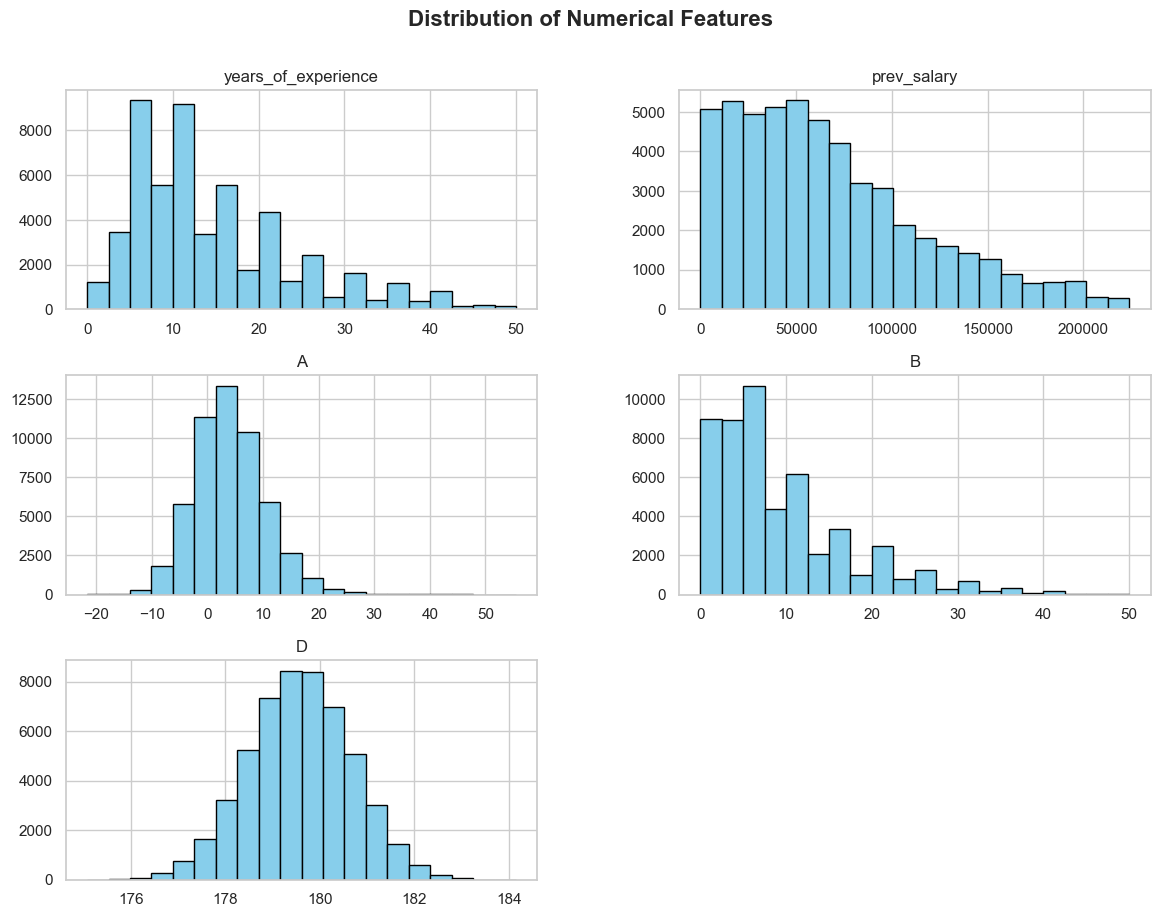

In [6]:
# Distribution of numerical features
def visual_num_features(df):
    # Set plot style
    sns.set(style="whitegrid", palette="pastel")

    # Numerical features to visualize
    features = ['years_of_experience', 'prev_salary', 'A', 'B', 'D']
    
    # Plot histograms
    df[features].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
    plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.9)
    plt.show()


visual_num_features(data_explor)

**Distribution of numerical features - A, B, D, Prev_salary, Years_of_experience**


We use histograms to visualize and understand the distribution of numerical features. 
Both features 'A' and 'D' appear to be normally distributed. 'A' has a slight skew and 'D' is centered around a mean value, indicating consistent data without much variation. 
The features 'Years of Experience,' 'Previous Salary,' and 'B' seem to have right-skewed distributions, with most values concentrated at the lower end. This indicates that most samples have lower values for these features, with fewer samples having higher values. In addition, the presence of a long tail suggests potential outliers that might need to be addressed during preprocessing. 
**From the histograms, we assume that the features 'A' and 'D' are normally distributed, while the features 'Years of Experience,' 'Previous Salary,' and 'B' appear to be right-skewed**

To identify outliers, we will visualize box plots of features A and D. 


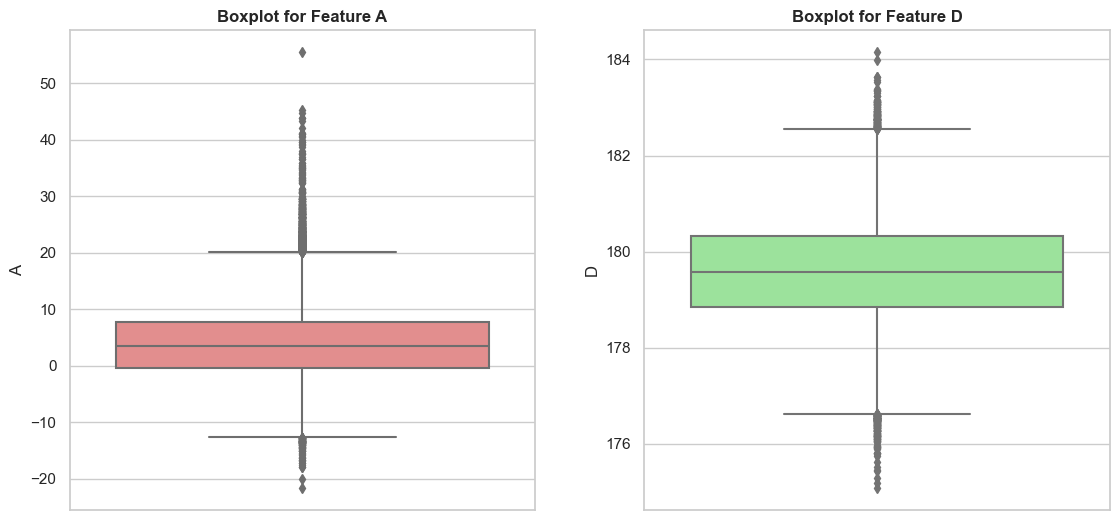

In [7]:
# Boxplots for 'A' and 'D'
def box_plot(df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(y=df['A'], ax=axes[0], color='lightcoral').set_title('Boxplot for Feature A', fontsize=12, fontweight='bold')
    sns.boxplot(y=df['D'], ax=axes[1], color='lightgreen').set_title('Boxplot for Feature D', fontsize=12, fontweight='bold')
    
    plt.tight_layout(pad=3.0)
    plt.show()
    
box_plot(data_explor)

**Insights from Box Plots of features 'A' and 'D'**

Feature A exhibits numerous outliers on both the high and low ends, while Feature D has fewer outliers primarily on the higher end. These outliers are particularly important to note because we initially assumed that the data is normally distributed. We'll need to address them in the next steps to ensure they don't adversely affect our models.

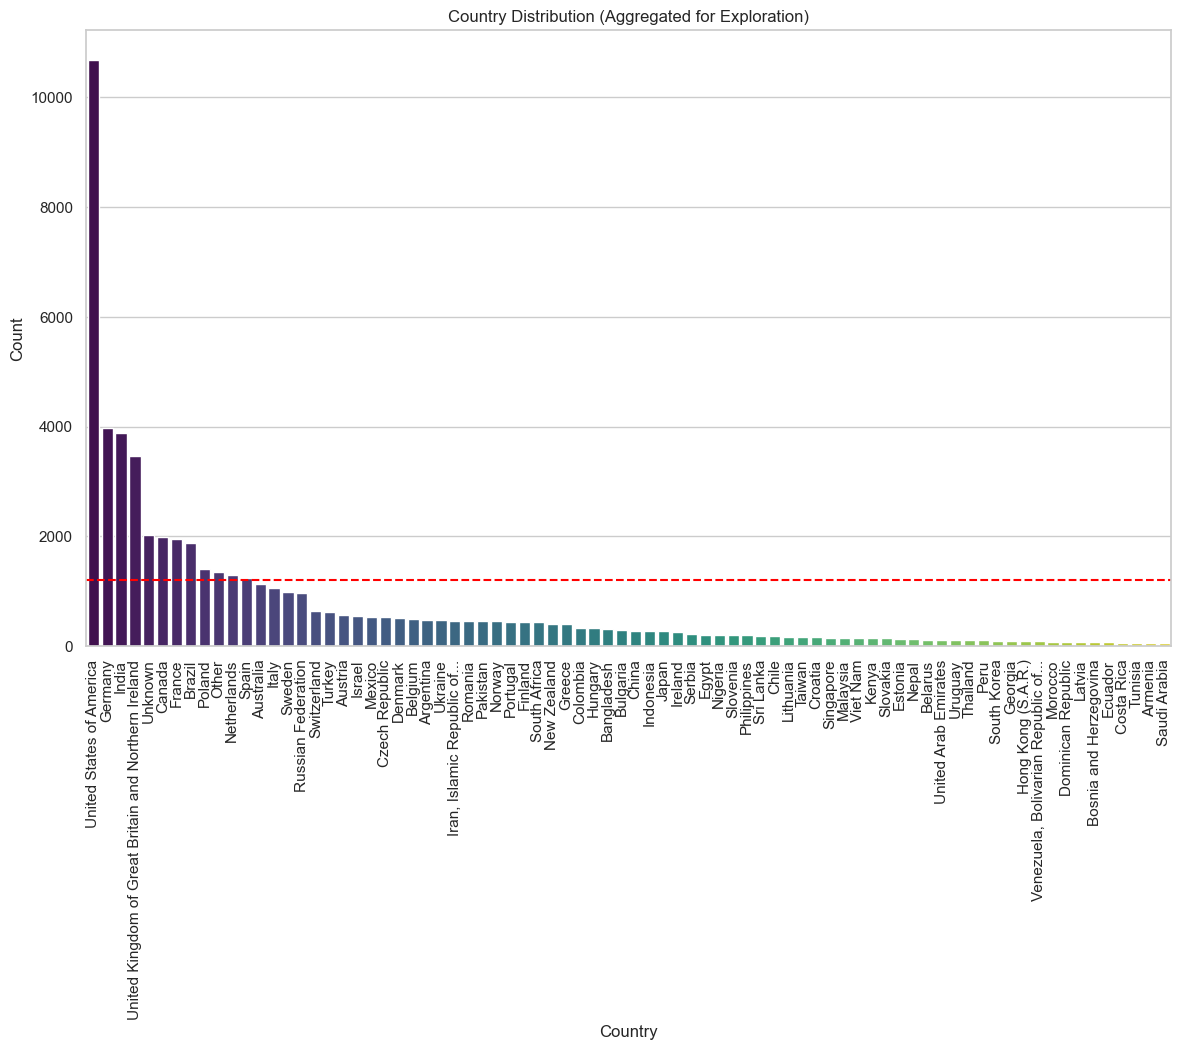

In [8]:
# Distribution for categorialic features 
# Distribution of 'country' for exploration
def visual_country_feature(df):
    threshold = 50  # Threshold for aggregation
    country_counts = df['country'].value_counts()

    # Handle NaN values temporarily for exploration
    country_counts = country_counts[country_counts.index.notna()]

    # Apply aggregation without modifying the original data
    def aggregate_countries(country):
        if pd.isna(country):
            return 'Unknown'
        return country if country_counts[country] > threshold else 'Other'

    aggregated_countries = df['country'].apply(aggregate_countries)

    # Plot the adjusted country distribution
    plt.figure(figsize=(14, 8))
    adjusted_country_counts = aggregated_countries.value_counts()
    sns.barplot(x=adjusted_country_counts.index, y=adjusted_country_counts.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.title('Country Distribution (Aggregated for Exploration)')
    # Add a dotted horizontal line at y=1500
    plt.axhline(y=1200, color='red', linestyle='--')
    plt.show()

visual_country_feature(data_explor)

**Country Distribution Analysis**

Our dataset includes 170 unique countries, which could potentially impact modeling performance. To create a clearer plot, we've set a threshold of 50 occurrences, grouping countries with fewer than 50 occurrences into an "Other" category.
From the plot, it's clear that the majority of the data comes from the United States, followed by Germany, India, and the United Kingdom. A significant portion of the data is categorized as "Unknown," which may require further investigation or specific handling. The red dashed line at 1200 counts serves as a reference point, highlighting countries with substantial representation.
To reduce dimensionality, we'll consider grouping less-represented countries into "Other" and decide how to handle the "Unknown" category in the modeling process.

Number of samples with empty list of stack exprience: (0, 17)
Number of samples with NaN stack exprience who are dev and worked in the past: (0, 17)
Occurrences of Technologies in Stack Experience:


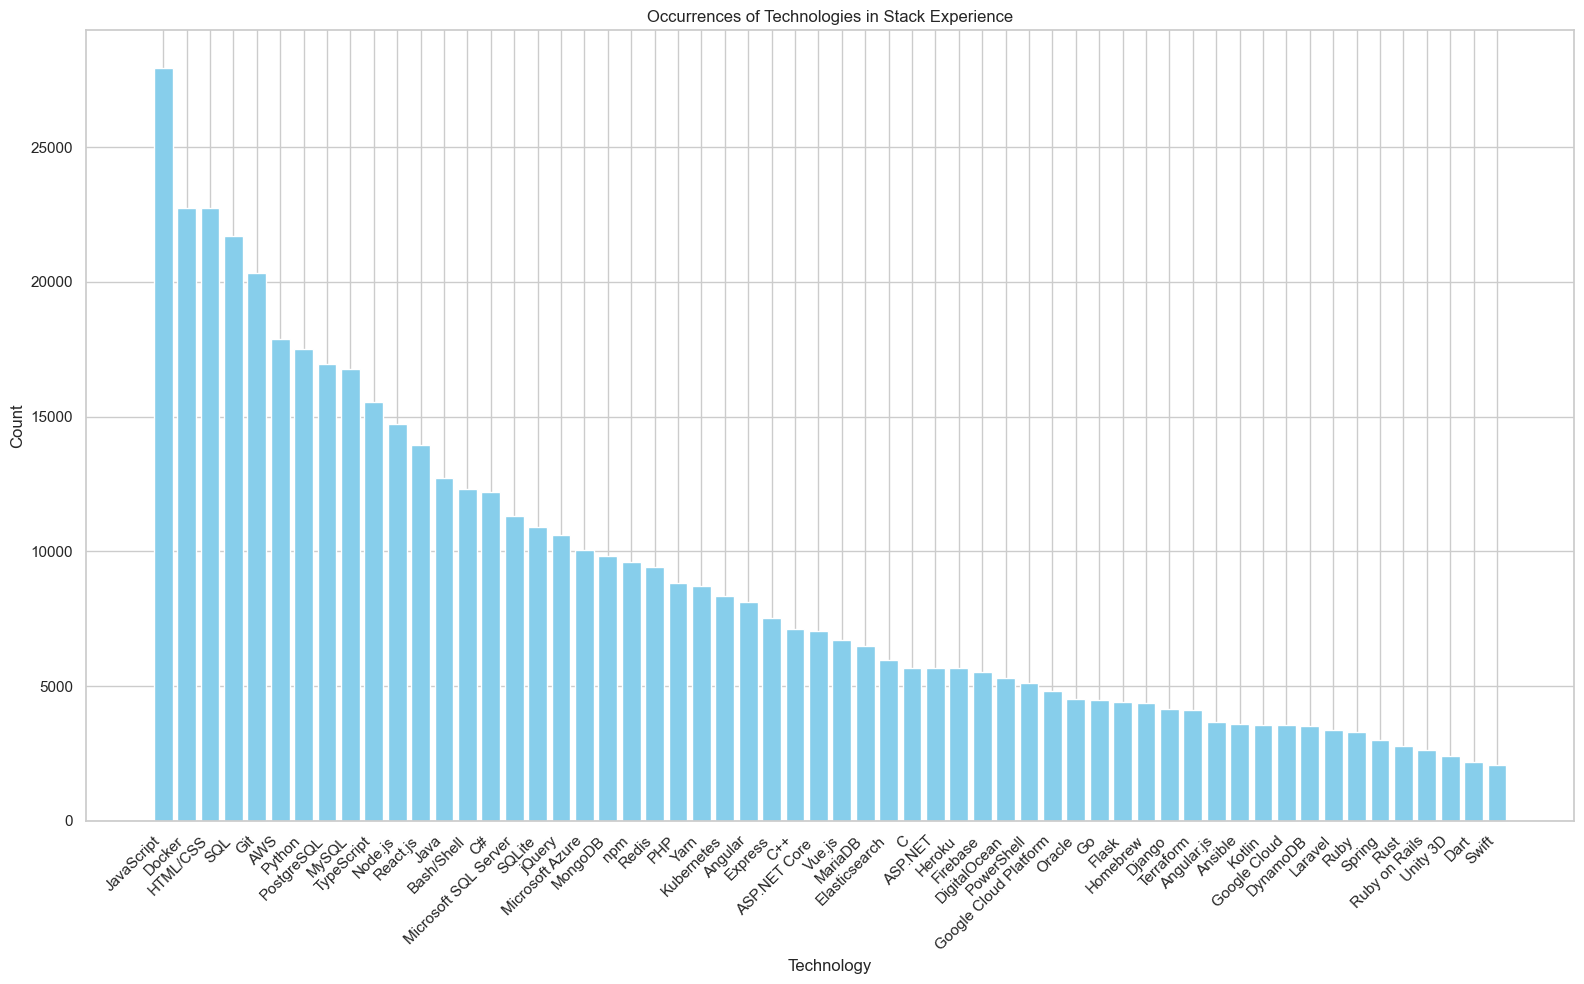

Occurrences of Technologies in Stack Experience (when label = 1):


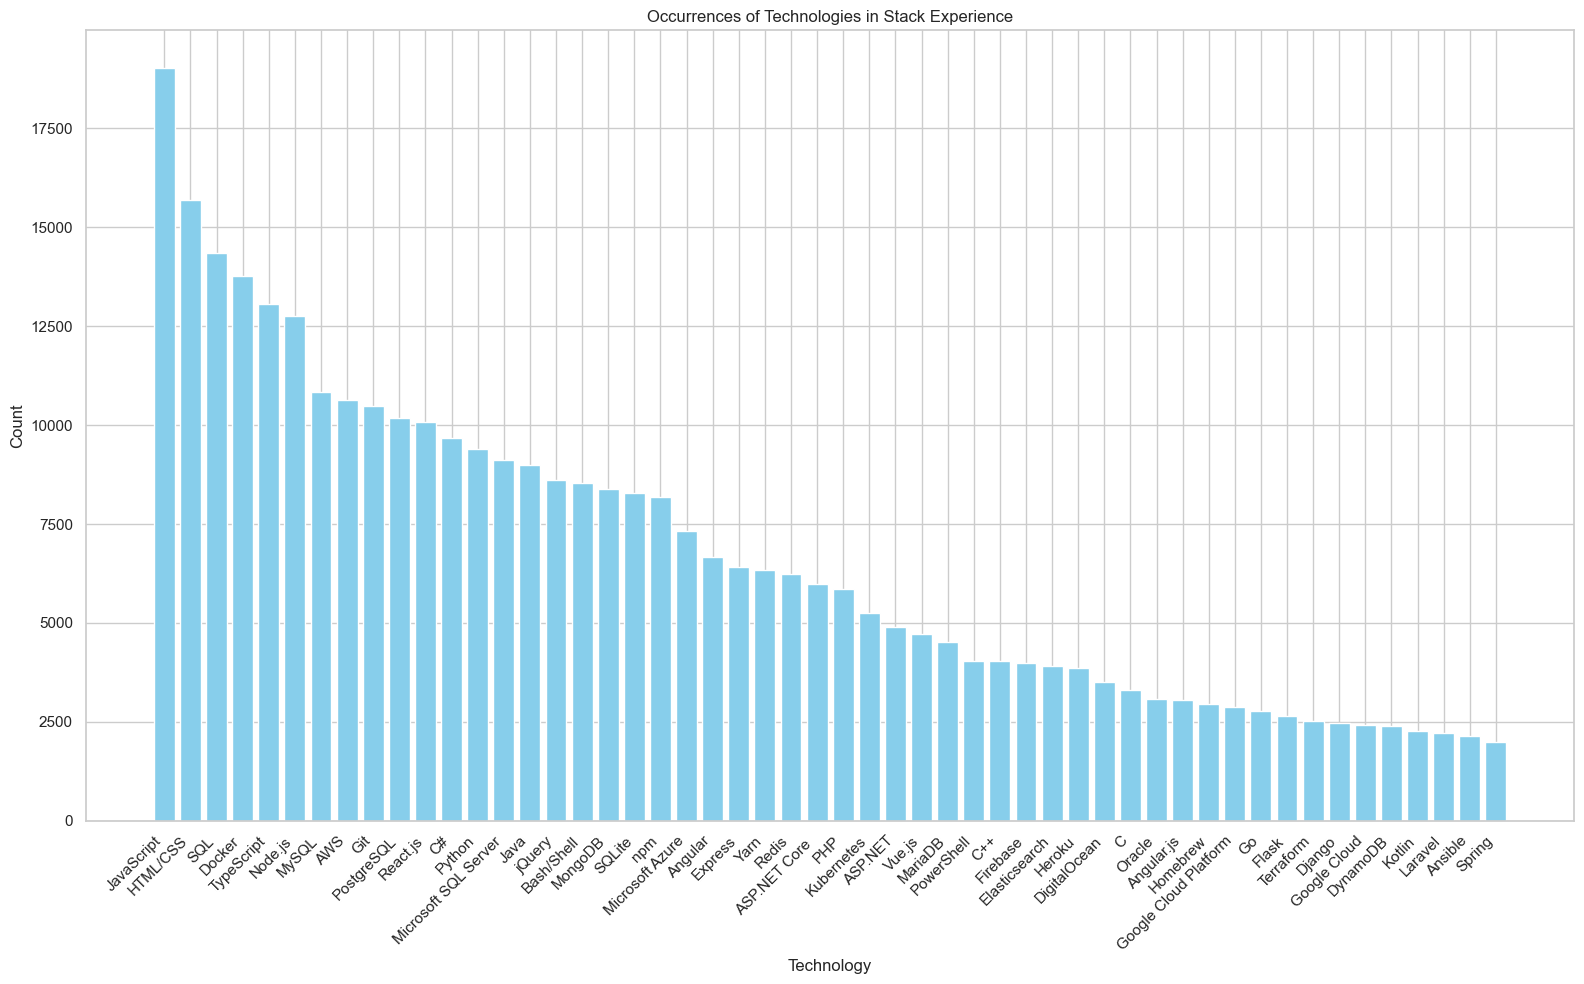

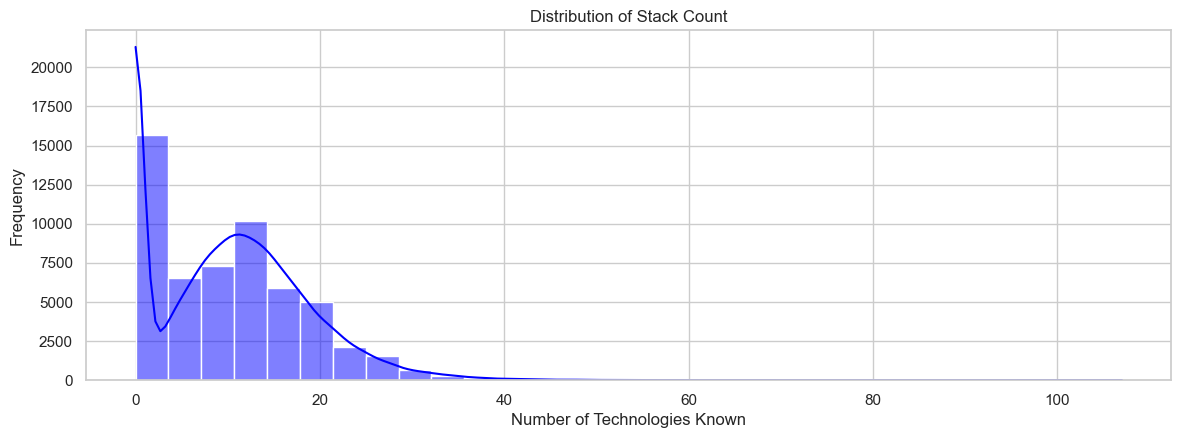

In [9]:
# Stack experience feature
def check_miss_val_for_stack_exp(df):
    filtered_df_with_empty_list = df[df['stack_experience'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
    filtered_df_with_nan = df[df['stack_experience'].isna()]
    filtered_df_with_nan = filtered_df_with_nan[
        (filtered_df_with_nan['is_dev'] == 'Dev') & 
        (filtered_df_with_nan['worked_in_the_past'] == 1)
    ]
    print('Number of samples with empty list of stack exprience:', filtered_df_with_empty_list.shape)
    print('Number of samples with NaN stack exprience who are dev and worked in the past:', filtered_df_with_nan.shape)
    return

def experience_feature(df): 
    # Add a temorery feature that counts the number of technologies known for each individual in stack_experience
    df_temp = df.copy()
    df_temp['stack_count'] = df_temp['stack_experience'].apply(lambda x: len(str(x).split(';')) if pd.notnull(x) else 0)

    # Set up the matplotlib figure size for the histograms and box plots
    plt.figure(figsize=(14, 10))
    
    # Histogram of stack_count
    plt.subplot(2, 1, 1)
    sns.histplot(df_temp['stack_count'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Stack Count')
    plt.xlabel('Number of Technologies Known')
    plt.ylabel('Frequency')
    
    return(df_temp)
def count_technology(df):
    # Extract and count technologies
    all_technologies = []
    for stack in df['stack_experience']:
        if pd.notna(stack):  # Check if the stack is not NaN
            technologies = stack.split(';')
            all_technologies.extend(technologies)
    
    technology_count = Counter(all_technologies)
    sorted_tech = technology_count.most_common()
    threshold = 2000  
    filtered_tech = [(tech, count) for tech, count in sorted_tech if count >= threshold]
    technologies, counts = zip(*filtered_tech)

    # Create a larger vertical bar chart
    plt.figure(figsize=(16, 10))
    plt.bar(technologies, counts, color='skyblue')
    plt.ylabel('Count')
    plt.xlabel('Technology')
    plt.title('Occurrences of Technologies in Stack Experience')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
    return technology_count 

check_miss_val_for_stack_exp(data_explor)
print(color.BOLD +"Occurrences of Technologies in Stack Experience:" + color.END)
count_tech = count_technology(data_explor)
print(color.BOLD +"Occurrences of Technologies in Stack Experience (when label = 1):"+ color.END)
df_label_1 = data_explor[data_explor['label'] == 1]
count_tech_for_1 = count_technology(df_label_1)
df_temp = experience_feature(data_explor)

**'Stack_experience Distribution Analysis:**

In our missing values analysis, we found that the "Stack experience" feature had the highest percentage of missing values (27.4%). We hypothesized that these missing values represent samples with no stack experience. To confirm this, we ensured there were no empty lists in the "Stack experience" column and verified that no samples identified as developers (is_dev == 'Dev') had worked in the past. The results supported our assumption that the missing values indeed represent those without stack experience.

We visualized the occurrences of technologies in "Stack experience" across the dataset and observed that five technologies dominate: JavaScript, Docker, HTML/CSS, SQL, and Git. When focusing on samples that were accepted (label=1), six technologies stood out: JavaScript, HTML/CSS, SQL, Docker, TypeScript, and Node.js. JavaScript, HTML/CSS, and SQL are consistently the most common, indicating they may be strong predictors of hiring success.

We assume The distribution of Stack Count (length of the stuck experience list of each sample) is skewed, with most samples knowing only a few technologies, while a few know many. 

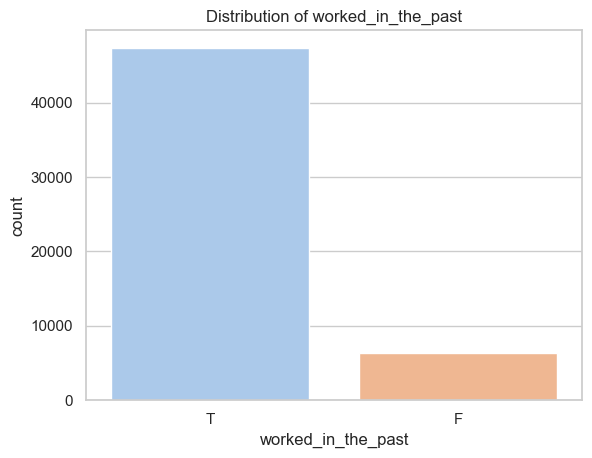

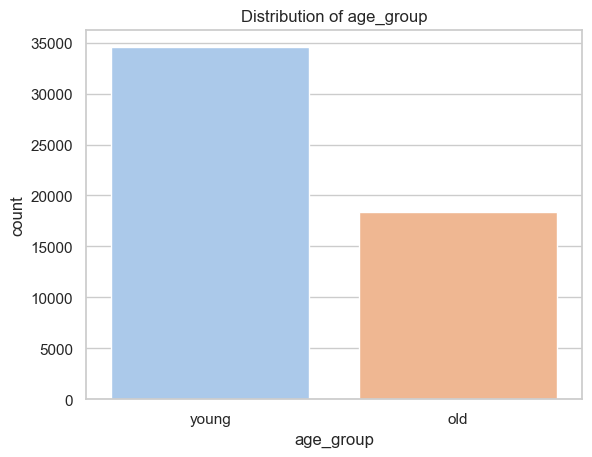

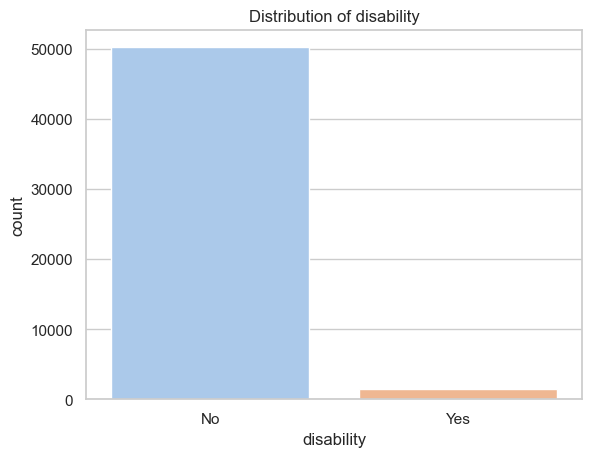

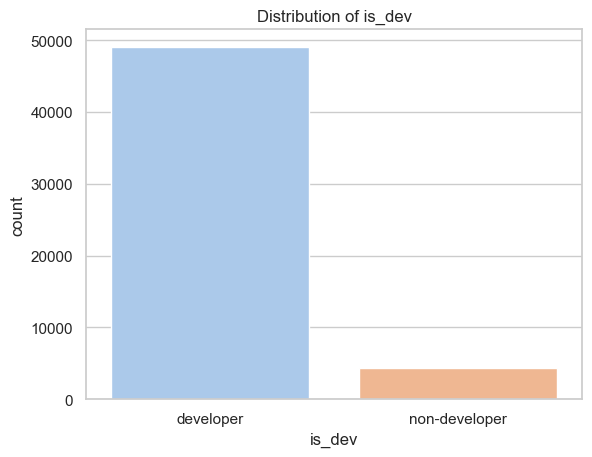

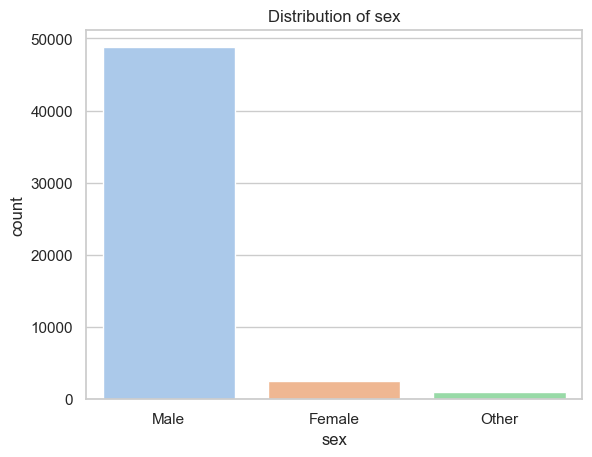

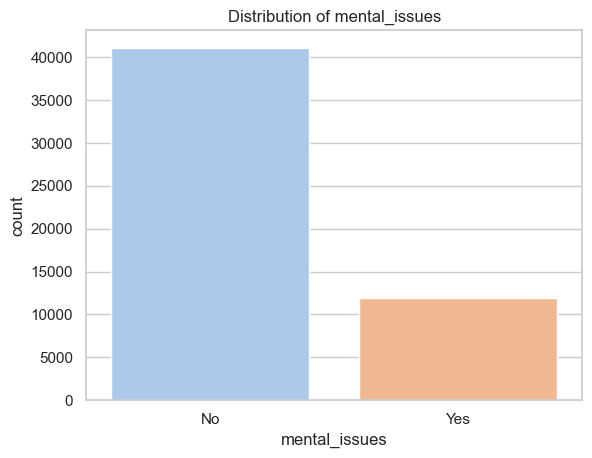

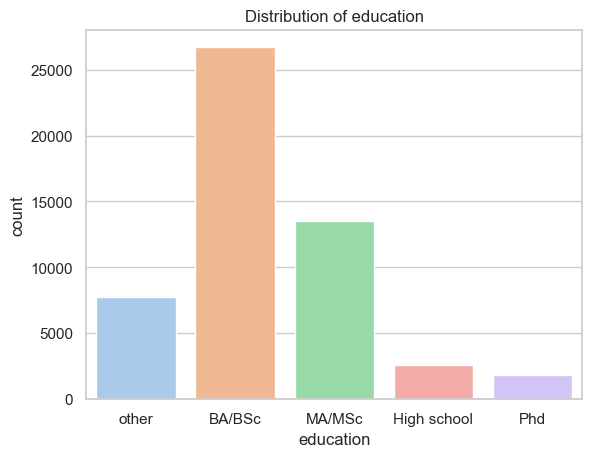

In [10]:
# Distribution of other categorical features
def visual_categ_features(df):
    categorical_features = ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'sex', 'mental_issues', 'education']
    for feature in categorical_features:
        sns.countplot(data=df, x=feature)
        plt.title(f'Distribution of {feature}')
        plt.show()

visual_categ_features(data_explor)

**distribution of the other categorical features - 'worked_in_the_past', 'age_group', 'disability', 'is_dev', 'sex':**

To explore the distribution of the categorical features we visualized them using bar charts. 
First, we see that most samples did work in the past. This strengthens our hypothesis that this feature could be a strong predictor of hiring. 
In addition, we can see that the samples pool is skewed towards younger individuals, samples without disabilities, samples that are developers, samples that are male and samples without mental issues. Samples with a BA/BSc degree are the most common, followed by MA/MSc. Higher education levels might correlate with higher hiring rates.

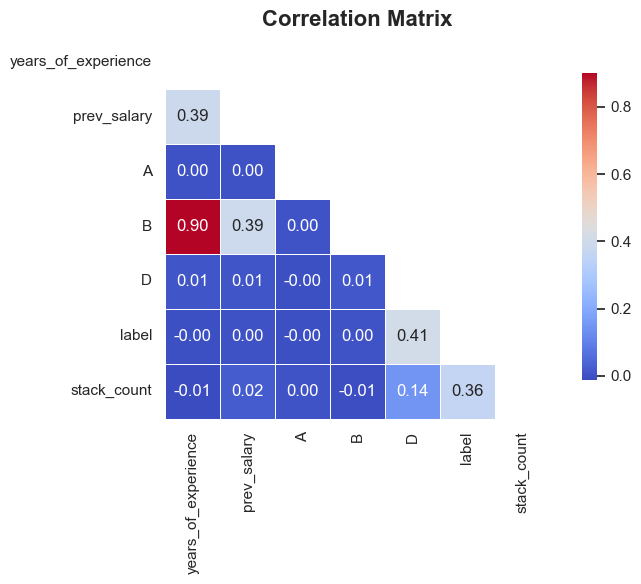

In [11]:
def corr_heatmap(df):
    # Numerical features for correlation
    features = ['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'label', 'stack_count']
    corr_matrix = df[features].corr()

    # Plot settings
    plt.figure(figsize=(8, 6))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
                cbar_kws={'shrink': 0.8}, linewidths=0.5, square=True)

    # Title and layout adjustments
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
corr_heatmap(df_temp)

**Correlation Matrix Analysis**

The correlation matrix provides valuable insights:

Strong Correlation Between Feature B and Years of Experience (0.90) - A strong positive correlation suggests Feature B is closely related to the number of years of experience, indicating it might reflect some aspect of professional tenure.

Moderate Correlation of Stack Count with Label (0.36) - The stack_count feature shows a moderate positive correlation with the label, supporting its inclusion as a relevant predictor in the model.
Moderate Correlation Between Label and Feature D (0.41):

Feature D also has a moderate correlation with the label, suggesting it could be a significant predictor of acceptance.

Low Correlation in Other Pairs:
Most other features show low correlations, indicating they contribute independently to the model, with minimal multicollinearity concerns.
Consideration for Feature Merging:

If dimensionality reduction becomes necessary, particularly if we opt for feature selection over PCA, we may need to consider merging features with high correlation, such as Feature B and Years of Experience, to reduce redundancy.

In summary, Feature B, Stack Count, and Feature D emerge as key predictors, with Feature B showing a particularly strong link to experience. We may also consider merging highly correlated features to manage dimensionality.



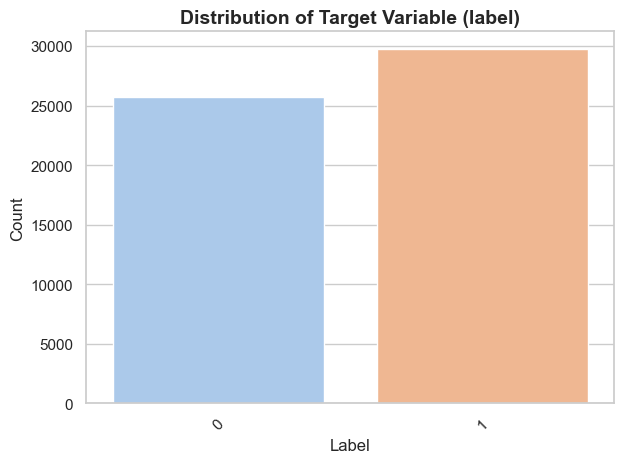

In [12]:
def target_dist(df):
    # Target variable distribution
    sns.countplot(data=df, x='label', palette='pastel')
    plt.title('Distribution of Target Variable (label)', fontsize=14, fontweight='bold')
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()
    

target_dist(data_explor) 

**Distribution of Target Variable (label):**

The distribution of hired (1) and not hired (0) is relatively balanced, which is favorable for binary classification models. 

In [13]:
def visualize_grouped_data(df, top_n_categories=10):
    sns.set(style='whitegrid')  # Set the plot style

    # Exclude 'stack_experience' and identify feature types
    df = df.drop(columns='stack_experience', errors='ignore')
    num_features = df.select_dtypes(include='number').columns
    cat_features = df.select_dtypes(include='object').columns

    # Plot heatmap for numerical features
    if len(num_features) > 0:
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.groupby('label')[num_features].mean(), annot=True, cmap='coolwarm',
                    fmt=".2f", cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='gray', square=True)
        plt.title('Mean Values of Numerical Features by Label', fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


**Mean Values of Numerical Features by Label visualization:**


From the Mean Values of Numerical Features by Label visualization we can see that Years of Experience feature has similar mean values for both hired (14.18) and not hired (14.26) samples, suggesting it might not be a strong predictor on its own. In addition, the Previous Salary feature shows higher mean salary for hired samples (67821.15) compared to not hired (67775.75). Although the difference is small, it indicates a slight preference for samples with higher salaries.


# Part B:

**Adding New Features: Stack Count and Top 10 Most Frequent Technologies**

The "Stack experience" feature consists of lists of programming languages, making it challenging to assess its impact on model predictions. To better utilize this information, we created a new feature, Stack count, which we hypothesize will influence the likelihood of being accepted for work.

During this process, we treated NaN values by converting them to 0, assuming they represent individuals with no stack experience.

Our visualization of the stack_count feature revealed a few dominant technologies among accepted samples. To capture this, we created binary features using OneHotEncoder for the 10 most frequently mentioned technologies among those who were accepted (label=1).

We selected the top 10 technologies to strike a balance between capturing the most relevant programming languages and reducing feature dimensionality. While each feature, including stack_count, may not be a strong predictor on its own, we believe their combination will enhance predictive power. This approach can help, for example, to distinguish between samples with similar stack counts but varying relevance of their programming skills, ultimately improving model accuracy.



In [14]:
# Add a new feature that counts the number of technologies known for each individual in stack_experience
def add_stack_count(df):
    df['stack_count'] = df['stack_experience'].apply(lambda x: len(str(x).split(';')) if pd.notnull(x) else 0)
    return df

# Adding 10 binary features for 10 programming lengueges 
def find_top_n_technology_features(train_df, val_df, test_df, technology_counter, n):
    # Identify top n technologies based on the training data
    top_n_technologies = [tech for tech, _ in technology_counter.most_common(n)]

    for tech in top_n_technologies:
        # Create a new binary column for each top technology in both datasets
        train_df[f'has_{tech}'] = train_df['stack_experience'].apply(
            lambda x: 1 if pd.notna(x) and tech in x.split(';') else 0
        )
        test_df[f'has_{tech}'] = test_df['stack_experience'].apply(
            lambda x: 1 if pd.notna(x) and tech in x.split(';') else 0
        )
        val_df[f'has_{tech}'] = val_df['stack_experience'].apply(
            lambda x: 1 if pd.notna(x) and tech in x.split(';') else 0
        )

    # Reassign the Columns
    cols = train_df.columns.tolist()
    cols.append(cols.pop(cols.index('label')))
    train_df = train_df[cols]
    cols = val_df.columns.tolist()
    cols.append(cols.pop(cols.index('label')))
    val_df = val_df[cols]
    return train_df, val_df, test_df


**Are there any outliers in the data? If so, you should remove them or at least consider them**


We did find outliers in most of our data. Features A and D (box plot of features A and D, histogram of features Years of experience, Previous salary, B …). To receive normalized means that represent our data and not the extreme values that may be errors, we’ve decided to handle the outliers before normalization. We used two different methods for handling the outliers: IQR method (a method that is suited for normally distributed variables) to handle features A and D which we assumed (according to the visualization), that they were normally distributed. For features Years of experience, Previous salary, Stack count and B (features we assumed to be right-skewed distributed) we used the modified_z_score method (a robust technique used to detect outliers in a dataset by using the median and median absolute deviation).

In [15]:
# Outliers removal
# Define the IQR method for outlier removal
def remove_outliers_iqr(train, column):
    # Filter out NaN values
    non_null_df = train[column].dropna()
    Q1 = non_null_df.quantile(0.25)
    Q3 = non_null_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a mask for the bounds
    mask = (train[column] >= lower_bound) & (train[column] <= upper_bound) | train[column].isnull()
    return train[mask]

# Define the Modified Z-score method for outlier removal
def remove_outliers_modified_z(train, column, threshold=3.5):
    # Filter out NaN values
    non_null_df = train[column].dropna()
    median = non_null_df.median()
    mad = np.median(np.abs(non_null_df - median))
    if mad == 0:  # Prevent division by zero
        return train
    modified_z_scores = 0.6745 * (train[column] - median) / mad
    # Create a mask for the bounds
    mask = (np.abs(modified_z_scores) < threshold) | train[column].isnull()
    # Print the calculated values for debugging
    print(f"Column: {column}, Median: {median}, MAD: {mad}, Threshold: {threshold}")
    return train[mask]

def remove_outliers(train):
    # Remove outliers using IQR method for features A and D
    df_no_outlier = remove_outliers_iqr(train, 'A')
    df_no_outlier = remove_outliers_iqr(df_no_outlier, 'D')

    # Remove outliers using Modified Z-score method for features years_of_experience, prev_salary, B
    df_no_outlier = remove_outliers_modified_z(df_no_outlier, 'years_of_experience')
    df_no_outlier = remove_outliers_modified_z(df_no_outlier, 'prev_salary')
    df_no_outlier = remove_outliers_modified_z(df_no_outlier, 'B')
    df_no_outlier = remove_outliers_modified_z(df_no_outlier, 'stack_count')

    # Print the shape of the dataset before and after outlier removal
    print("Original DataFrame shape:", train.shape)
    print("DataFrame shape after outlier removal:", df_no_outlier.shape)

    # Distribution of numerical features after removing outliers
    numerical_features = ['years_of_experience', 'prev_salary', 'A', 'B', 'D']
    df_no_outlier[numerical_features].hist(bins=20, figsize=(14, 10))
    plt.suptitle('Distribution of Numerical Features After Outliers Removal')
    plt.show()
    
    return(df_no_outlier)

**Is the data normalized? If not - should they be normalized? What is the importance of normalizing the data in the problem?**

The data is not normalized, as evidenced by the varying means and standard deviations of the numerical features. Normalization is necessary because the features in the dataset have significantly different scales, which can negatively impact the performance of our models. By normalizing the data, each feature will contribute equally, improving the model's convergence and overall accuracy. We implemented a standard scaler normalization on our data.


In [16]:
#Normalizing the data
def normalize(train, val, test):
    # Make a copy of the dataframes to avoid modifying the originals
    train_normalized = train.copy()
    val_normalized = val.copy()
    test_normalized = test.copy()
    numerical_features = ['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']
    
    scaler = StandardScaler()
    train_normalized[numerical_features] = scaler.fit_transform(train_normalized[numerical_features])
    
    # Transform the validation and test data using the same scaler
    val_normalized[numerical_features] = scaler.transform(val_normalized[numerical_features])
    test_normalized[numerical_features] = scaler.transform(test_normalized[numerical_features])
    
    return train_normalized,val_normalized, test_normalized

**Is there any missing data? How did you choose to treat them and why in this way?**


Yes, our dataset has missing data. We set a 25% threshold for missing values in any sample—if a sample had 25% or more missing data, we removed it, believing such samples wouldn't provide useful information and could add noise. For numerical features, we filled missing values with the median, which is robust to outliers and preserves the data distribution. For categorical features (excluding 'countries'), we used the most frequent category to fill in missing values, maintaining the data's common characteristics and minimizing bias. We treated missing values in the 'stack experience' feature as meaningful, assuming they represent individuals without stack experience rather than data errors. This approach helped us retain valuable information while minimizing bias in the dataset.




In [17]:
# Handeling Missing Values
def remove_samples_MV(df,threshold):
    # Calculate the percentage of missing values for each feature
    feature_missing_percentage = df.isnull().mean() * 100

    # Calculate the percentage of missing values for each sample (row)
    sample_missing_percentage = df.isnull().mean(axis=1) * 100

    # Identify samples with more than the threshold percentage of missing data
    samples_with_excessive_missing = sample_missing_percentage[sample_missing_percentage > threshold]

    # Remove samples with excessive missing data
    df_cleaned = df[sample_missing_percentage <= threshold]

    print(f"Shape after removing samples with more than {threshold}% missing data: {df_cleaned.shape}")
    return(df_cleaned)

def filling_missing_values(train_df, val_df, test_df):
    # Make copies to avoid modifying the original data
    train_cleaned = train_df.copy()
    val_cleaned = val_df.copy()
    test_cleaned = test_df.copy()

    # Impute missing values for numerical features with the median from training data
    numerical_features = ['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']
    for col in numerical_features:
        median_value = train_cleaned[col].median()
        train_cleaned[col] = train_cleaned[col].fillna(median_value)
        test_cleaned[col] = test_cleaned[col].fillna(median_value)
        val_cleaned[col] = val_cleaned[col].fillna(median_value)
        
    # Impute missing values for categorical features with the mode from training data
    categorical_columns = ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'education', 'sex', 'mental_issues', 'C']
    for col in categorical_columns:
        mode_value = train_cleaned[col].mode()[0]
        train_cleaned[col] = train_cleaned[col].fillna(mode_value)
        test_cleaned[col] = test_cleaned[col].fillna(mode_value)
        val_cleaned[col] = val_cleaned[col].fillna(mode_value)

    # Impute missing values in 'stack_experience' with a meaningful value 'NoExperience'
    train_cleaned['stack_experience'] = train_cleaned['stack_experience'].fillna('NoExperience')
    test_cleaned['stack_experience'] = test_cleaned['stack_experience'].fillna('NoExperience')
    val_cleaned['stack_experience'] = val_cleaned['stack_experience'].fillna('NoExperience')

    print("Missing values after imputation in train set:")
    print(train_cleaned.isnull().sum())

    print("\nMissing values after imputation in test set:")
    print(test_cleaned.isnull().sum())

    print("\nMissing values after imputation in validation set:")
    print(val_cleaned.isnull().sum())
    
    return train_cleaned, val_cleaned, test_cleaned

**Dealing with categorical variables**


**Country Feature  - missing values and encoding**

The Country feature is a categorical feature that contains 170 different countries thus we will have to handle it. 
We first thought to encode these categories into binary features, but we suspect that due to the large number of categories, we will increase its dimensions, which will lead to overfitting and large runtimes. 
We assume that looking at categories of countries based on geographic areas represents our data optimally enough. Therefore, we decided to reduce the number of categories by dividing the feature into geographic categories. That is, countries from the same geographic area will be united to the suitable category. 

From the Country Distribution histogram, we can see that almost all countries have 2000 or less samples that originated there. We first decided that countries with more than 1500 samples will stay as an independent geographic area. We then tried lowering it to 1200, to improve our model’s performance. Countries with too few appearances could easily be assigned to an existing geographic group so that there was no need to treat them separately. We did make sure that no country with too few appearances "opened" its own geographical area but was attached to an existing one. 
The rest of the countries were merged into different categories based on their suitable geographic area. Because there is already an existing category of "unknown", we decided to add all the missing values to this group. 

Finally, we used One Hot Encoder to encode all the categories to binary variables. Countries that weren’t merged are: USA, India, Germany, UK, France, Canada, Brazil, Poland, Netherlands and Spain. The rest were combined into geographic areas such as: Western Europe, Southern Europe, Eastern Europe/ Balkans, Nordic Countries, Asia, Middle east, Africa, South America/ Caribbean and Oceania

In [18]:
def country_red_and_encoding(train_df, val_df, test_df):
    # Country to region mapping
    country_to_region = {
        'United States of America': 'USA',
        'India': 'India',
        'Germany': 'Germany',
        'United Kingdom of Great Britain and Northern Ireland': 'UK',
        'France': 'France',
        'Canada': 'Canada',
        'Brazil': 'Brazil',
        'Poland': 'Poland',
        'Netherlands': 'Netherlands',
        'Spain': 'Spain',

        # Western Europe
        'Belgium': 'Western Europe',
        'Switzerland': 'Western Europe',
        'Austria': 'Western Europe',
        'Luxembourg': 'Western Europe',
        'Andorra': 'Western Europe',

        # Southern Europe
        'Italy': 'Southern Europe',
        'Portugal': 'Southern Europe',
        'Greece': 'Southern Europe',

        # Eastern Europe/Balkans
        'Czech Republic': 'Eastern Europe',
        'Hungary': 'Eastern Europe',
        'Slovakia': 'Eastern Europe',
        'Slovenia': 'Eastern Europe',
        'Ukraine': 'Eastern Europe',
        'Romania': 'Eastern Europe',
        'Bosnia and Herzegovina': 'Eastern Europe',
        'Kosovo': 'Eastern Europe',
        'Montenegro': 'Eastern Europe',
        'Serbia': 'Eastern Europe',
        'Albania': 'Eastern Europe',
        'Republic of Moldova': 'Eastern Europe',
        'Georgia': 'Eastern Europe',
        'Malta': 'Eastern Europe',
        'Moldova': 'Eastern Europe',
        'North Macedonia': 'Eastern Europe',
        'Montenegro': 'Eastern Europe',
        'Serbia': 'Eastern Europe',
        'Kosovo': 'Eastern Europe',
        'Bosnia and Herzegovina': 'Eastern Europe',
        'Czech Republic': 'Eastern Europe',
        'Hungary': 'Eastern Europe',
        'Slovakia': 'Eastern Europe',
        'Romania': 'Eastern Europe',
        'Croatia': 'Eastern Europe',
        'Bulgaria': 'Eastern Europe',
        'Belarus': 'Eastern Europe',
        'Ukraine': 'Eastern Europe',
        'Moldova': 'Eastern Europe',
        'Russia': 'Eastern Europe',
        'Armenia': 'Eastern Europe',
        'Lithuania': 'Eastern Europe',
        'Latvia': 'Eastern Europe',
        'Estonia': 'Eastern Europe',
        'Slovenia': 'Eastern Europe',
        'Albania': 'Eastern Europe',
        'Georgia': 'Eastern Europe',
        'Belarus': 'Eastern Europe',
        'Bulgaria': 'Eastern Europe',

        # Nordic Countries
        'Sweden': 'Nordic',
        'Denmark': 'Nordic',
        'Norway': 'Nordic',
        'Finland': 'Nordic',
        'Iceland': 'Nordic',
        'Iceland': 'Nordic',

        # Asia
        'China': 'Asia',
        'Japan': 'Asia',
        'South Korea': 'Asia',
        'Israel': 'Asia',
        'Turkey': 'Asia',
        'Pakistan': 'Asia',
        'Bangladesh': 'Asia',
        'Iran, Islamic Republic of...': 'Asia',
        'Indonesia': 'Asia',
        'Thailand': 'Asia',
        'Philippines': 'Asia',
        'Malaysia': 'Asia',
        'Viet Nam': 'Asia',
        'Singapore': 'Asia',
        'Mongolia': 'Asia',
        'Afghanistan': 'Asia',
        'Kyrgyzstan': 'Asia',
        'Azerbaijan': 'Asia',
        'Turkmenistan': 'Asia',
        'Tajikistan': 'Asia',
        'Kyrgyz Republic': 'Asia',
        'Uzbekistan': 'Asia',
        'Kazakhstan': 'Asia',
        'Vietnam': 'Asia',
        'Sri Lanka': 'Asia',
        'Maldives': 'Asia',
        'Myanmar': 'Asia',
        'Nepal': 'Asia',
        
        # Middle East
        'Saudi Arabia': 'Middle East',
        'United Arab Emirates': 'Middle East',
        'Jordan': 'Middle East',
        'Lebanon': 'Middle East',
        'Palestine': 'Middle East',
        'Oman': 'Middle East',
        'Kuwait': 'Middle East',
        'Bahrain': 'Middle East',
        'Qatar': 'Middle East',
        'Iraq': 'Middle East',
        'Syria': 'Middle East',
        'Yemen': 'Middle East',
        'Kuwait': 'Middle East',

        # Africa
        'South Africa': 'Africa',
        'Egypt': 'Africa',
        'Nigeria': 'Africa',
        'Kenya': 'Africa',
        'Morocco': 'Africa',
        'Burkina Faso': 'Africa',
        'Gambia': 'Africa',
        'Mauritania': 'Africa',
        'Mali': 'Africa',
        'Lesotho': 'Africa',
        'Suriname': 'Africa',
        'Seychelles': 'Africa',
        'Burundi': 'Africa',
        'Mauritius': 'Africa',
        'Algeria': 'Africa',
        'Zimbabwe': 'Africa',
        'Malawi': 'Africa',
        'Sudan': 'Africa',
        'Madagascar': 'Africa',
        'Ethiopia': 'Africa',
        'Republic of Congo': 'Africa',
        'Angola': 'Africa',
        'Benin': 'Africa',
        'Tanzania': 'Africa',
        'Uganda': 'Africa',
        'Namibia': 'Africa',
        'Ghana': 'Africa',
        'Zambia': 'Africa',
        'Senegal': 'Africa',
        'Cameroon': 'Africa',
        'Rwanda': 'Africa',

        # South America/Caribbean
        'Argentina': 'South America',
        'Chile': 'South America',
        'Colombia': 'South America',
        'Uruguay': 'South America',
        'Peru': 'South America',
        'Guyana': 'South America',
        'Paraguay': 'South America',
        'Bolivia': 'South America',
        'Guatemala': 'South America',
        'Panama': 'South America',
        'El Salvador': 'South America',
        'Nicaragua': 'South America',
        'Honduras': 'South America',
        'Jamaica': 'South America',
        'Trinidad and Tobago': 'South America',
        'Barbados': 'South America',
        'Dominican Republic': 'South America',
        'Haiti': 'South America',
        'Jamaica': 'South America',

        # Oceania
        'Australia': 'Oceania',
        'New Zealand': 'Oceania',

        # Small countries and others
        'Unknown': 'Unknown',
        'Nomadic': 'Unknown',  # Assuming this to be unclassifiable

    }

    # Map the 'country' column to 'region' for all datasets
    for df in [train_df, val_df, test_df]:
        # Apply mapping
        df['region'] = df['country'].map(country_to_region)
        
        # Fill NaN regions with 'Unknown'
        df['region'].fillna('Unknown', inplace=True)

    # Initialize OneHotEncoder with handle_unknown parameter
    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

    # Fit the encoder on the training data
    onehot_encoder.fit(train_df[['region']])

    # Transform 
    train_encoded = onehot_encoder.transform(train_df[['region']])
    val_encoded = onehot_encoder.transform(val_df[['region']])
    test_encoded = onehot_encoder.transform(test_df[['region']])

    # Get the feature names for the encoded columns
    region_feature_names = onehot_encoder.get_feature_names_out(['region'])

    # Create DataFrames for the encoded features
    train_encoded_df = pd.DataFrame(train_encoded, columns=region_feature_names, index=train_df.index)
    val_encoded_df = pd.DataFrame(val_encoded, columns=region_feature_names, index=val_df.index)
    test_encoded_df = pd.DataFrame(test_encoded, columns=region_feature_names, index=test_df.index)

    # Concatenate the original DataFrames with the encoded DataFrames
    train_final = pd.concat([train_df, train_encoded_df], axis=1)
    val_final = pd.concat([val_df, val_encoded_df], axis=1)
    test_final = pd.concat([test_df, test_encoded_df], axis=1)

    # Drop the original 'country' and 'region' columns
    train_final.drop(['country', 'region'], axis=1, inplace=True)
    val_final.drop(['country', 'region'], axis=1, inplace=True)
    test_final.drop(['country', 'region'], axis=1, inplace=True)
    
    return train_final, val_final, test_final

**Handling other categorical features**

For the rest of the categorical features, we used one hot encoder as well, to convert them to binary variables according to the number of categories in each. At the end of handling the categorical features, we grew from 17 features to 61 features. 

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def categ_to_num(train_df, val_df, test_df):
    # Identify Categorical Features to Encode
    categorical_features = ['worked_in_the_past', 'age_group', 'disability', 'is_dev', 'sex', 'mental_issues', 'education', 'C']

    # Check unique values for each categorical feature in the training data
    for feature in categorical_features:
        unique_values = train_df[feature].nunique()
        print(f"Unique values in {feature}: {unique_values}")

    encoder = OneHotEncoder(sparse=False) # Do not drop the first category

    # Fit the encoder on the training data
    train_encoded_features = encoder.fit_transform(train_df[categorical_features])

    # Transform the test and val data using the same encoder
    test_encoded_features = encoder.transform(test_df[categorical_features])
    val_encoded_features = encoder.transform(val_df[categorical_features])

    # Create DataFrames with Encoded Features
    train_encoded_df = pd.DataFrame(train_encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=train_df.index)
    test_encoded_df = pd.DataFrame(test_encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=test_df.index)
    val_encoded_df = pd.DataFrame(val_encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=val_df.index)

    # Drop Original Categorical Columns and Concatenate Encoded Features
    train_no_categorical = train_df.drop(columns=categorical_features)
    train_no_categorical = pd.concat([train_no_categorical.reset_index(drop=True), train_encoded_df.reset_index(drop=True)], axis=1)

    test_no_categorical = test_df.drop(columns=categorical_features)
    test_no_categorical = pd.concat([test_no_categorical.reset_index(drop=True), test_encoded_df.reset_index(drop=True)], axis=1)
    
    val_no_categorical = val_df.drop(columns=categorical_features)
    val_no_categorical = pd.concat([val_no_categorical.reset_index(drop=True), val_encoded_df.reset_index(drop=True)], axis=1)

    # Move 'label' to the end
    cols = train_no_categorical.columns.tolist()
    cols.append(cols.pop(cols.index('label')))
    train_no_categorical = train_no_categorical[cols]

    cols = val_no_categorical.columns.tolist()
    cols.append(cols.pop(cols.index('label')))
    val_no_categorical = val_no_categorical[cols]

    print("\nTraining DataFrame after OneHotEncoding categorical features:")
    print(train_no_categorical.shape)

    print("\Test DataFrame after OneHotEncoding categorical features:")
    print(test_no_categorical.shape)
 
    print("\nValidation DataFrame after OneHotEncoding categorical features:")
    print(val_no_categorical.shape) 
    
    return train_no_categorical, val_no_categorical, test_no_categorical



**At this point we took care of everything that was needed (we have no more missing values, no categorical features...) and can already run a model.**


**PCA**

After observing the results of our grid search on K-fold cross-validation with the optimal hyperparameters (on the train data), we recognized that the high dimensionality of our dataset, with 61 features, was likely contributing to overfitting, particularly in the KNN and Random Forest models. Overfitting, where models capture noise rather than true data patterns, is a common issue in high-dimensional spaces, leading to poor generalization on new data.

Both the KNN and Random Forest models showed signs of overfitting, with KNN reaching a perfect Training AUC of 1 and Random Forest at 0.99. To address this, we decided to apply Principal Component Analysis (PCA) to reduce dimensionality. PCA transforms the original features into a smaller set of components while retaining most of the variance. We initially started with 95% explained variance for PCA but later increased this to 98% to capture more information and improve model performance.

In [20]:
# PCA - Determine the number of components to explain 98% of the variance
def plot_pca_explained_variance(df):
    pca = PCA().fit(df)

    # Plot explained variance
    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Components')
    plt.axhline(y=0.98, color='r', linestyle='--', label='98% Explained Variance')
    plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.98), color='g', linestyle='--', label='Selected Components')
    plt.legend()
    plt.show()
    return


**The test function determined that we need 41 components to explain 98% of the variance.**

So we will apply PCA with n_components = 41

In [21]:
# PCA function
def apply_pca(X_train, X_val, X_test, n_components):
    # Initialize PCA with the desired number of components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)

    # Calculate explained variance ratio
    explained_variance = pca.explained_variance_ratio_

    # Calculate loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=X_train.columns
    )
    print("Explained Variance Ratio:", explained_variance)

    return X_train_pca, X_val_pca, X_test_pca, explained_variance, loadings, pca

**Importance of Each Feature to the Success of the Model**

By applying PCA, we lose direct business or logical interpretability of individual features, but we can still assess the explained variance ratio for each principal component.

The scree plot shows the explained variance ratio for each of the 41 principal components. There’s a steep decline after the first few components, with the curve flattening around the 5th component, indicating that the first few components capture most of the variance. However, to retain as much information as possible, we decided to keep all 41 components, which together explain 98% of the total variance.


In [22]:
def analyze_pca(pca, feature_names, component=1):
    # Calculate loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=feature_names
    )
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio:", explained_variance)
    
    # Scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.xticks(ticks=range(1, len(explained_variance) + 1))
    plt.grid(True)
    plt.show()
    
    return loadings

**Summary of Validation and Test Data Processing**

Feature Engineering: Added stack_count and binary features for the top 10 technologies based on training data.

Normalization: Applied StandardScaler fitted on the training data to numerical features in both validation and test datasets.

Outliers: Outliers were **not** removed from the validation or test datasets, preserving their original structure.

Missing Values: Imputed missing values using medians (numerical) and modes (categorical) from the training data. stack_experience was filled with 'NoExperience'.

Encoding: One-hot encoded categorical features and regions using encoders fitted on the training data.

PCA: Applied PCA, fitted on training data, to reduce dimensionality in both validation and test datasets.

This approach ensures consistency with the training data while preserving the integrity of the validation and test sets for model evaluation.

# Part C: Running the models

In this project, we experimented with four different models for binary classification: 
K-Nearest Neighbors (KNN), Logistic Regression, Random Forest, and Multi-Layer Perceptron (MLP). 

Two models that can reach overfitting regardless of the dimensionality of the model (or regularization) are the KNN model (with a small K) and the Random Forest model (if the number of trees is too large). 

The reasoning behind the selection of these models is as follows: 

**KNN** - simple to understand and implement, making it a suitable starting point for comparison. Its non-parametric nature allows flexibility, as it does not assume any underlying data distribution. 

**Logistic Regression** - well suited for binary classification problems. It provides interpretability through coefficients, indicating the importance and direction of influence of each feature. 

**Random Forest** - can handle complex interactions between features and non-linear relationships effectively. 

**MLP** - capable of modeling complex, non-linear relationships between features and the target variable. The architecture of it can be adjusted to fit different types of data and problems. 

By evaluating the performance of these models, we aim to identify the most suitable approach for the binary classification problem at hand. Based on the results we will obtain, we may consider experimenting with other models or further tuning the selected models to achieve optimal performance. 

To find the best hyper parameters for each model we used grid search function (a systematic way to explore hyperparameter values and find the optimal combination that maximizes model performance - ROC,AUC). 

The grid search runs on the train data, and returns for each model the Train AUC, Validation AUC, Best Parameters.

**The hyperparameters we chose to change and the specific values we selected for the grid search, for every model are**: 

**KNN**: We tuned n_neighbors ([5, 7, 9, 12]) and weights ([uniform, distance]). The n_neighbors parameter controls how many neighbors contribute to the classification, crucial for balancing overfitting (too few neighbors) and underfitting (too many neighbors). The weights parameter tests whether all neighbors contribute equally (uniform) or if closer ones should have more influence (distance), impacting model performance based on proximity.

**Logistic Regression**: We selected penalty (['none']) and solver (['lbfgs', 'saga']). The penalty parameter was tested without regularization to establish a baseline performance, while the solver parameter was chosen to compare the efficiency of different optimization algorithms. lbfgs is efficient for smaller datasets, and saga is scalable and suitable for larger or sparse data.

**MLP**: We adjusted hidden_layer_sizes ([(50,), (100,)]), activation (['tanh', 'relu']), solver (['adam']), and alpha ([0.0001, 0.001]). The hidden_layer_sizes define the network architecture, with selected sizes balancing learning capacity and computational efficiency. The activation functions introduce non-linearity, with tanh offering zero-centered outputs and relu providing faster convergence. The solver adam is robust for large datasets, and alpha values are chosen to control regularization, preventing overfitting while allowing complex pattern learning.

**Random Forest**: We tuned n_estimators ([100, 150]), max_depth ([None, 10]), and min_samples_split ([2, 5]). The n_estimators parameter controls the number of trees, where more trees improve performance but increase computational cost. The max_depth parameter limits tree growth to prevent overfitting, with None allowing full growth and 10 providing a reasonable balance. The min_samples_split ensures meaningful splits by requiring a minimum number of samples, with 2 and 5 chosen to test default behavior against a more conservative approach.



In [23]:
def evaluate_models(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grids for each model
    param_grids = {
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [5, 7, 9, 12],
                'weights': ['uniform', 'distance'],
            }
        },
        'logreg': {
            'model': LogisticRegression(penalty='none', max_iter=1000),
            'params': {
                'solver': ['lbfgs', 'saga']
            }
        },
        'mlp': {
            'model': MLPClassifier(max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['tanh', 'relu'],
                'solver': ['adam'],
                'alpha': [0.0001, 0.001]
            }
        },
        'rf': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 150],
                'max_depth': [None, 10],
                'min_samples_split': [2, 5]
            }
        }
    }

    results = {}
    grid_search_objects = {}

    for model_name, config in param_grids.items():
        print(f"Running GridSearchCV for {model_name}...")
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], 
                                   scoring='roc_auc', n_jobs=-1, cv=3, return_train_score=True, verbose=1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        
        # Store grid search object for visualization
        grid_search_objects[model_name] = grid_search

        # Evaluate on training data
        y_train_pred_prob = best_model.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_train_pred_prob)
        
        # Evaluate on validation data (using cross-validation results)
        y_val_pred_prob = best_model.predict_proba(X_test)[:, 1]
        auc_val = roc_auc_score(y_test, y_val_pred_prob)

        results[model_name] = {
            'best_params': grid_search.best_params_,
            'train_auc': auc_train,
            'validation_auc': auc_val
        }

        print(f"{model_name} - Best Params: {grid_search.best_params_}")
        print(f"{model_name} - Training AUC: {auc_train}")
        print(f"{model_name} - Validation AUC: {auc_val}")
    
    return results, grid_search_objects

def plot_bias_variance(grid_search, model_name):
    # Convert the grid search results to a DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)
    
    # Plot overall bias-variance trade-off
    plt.figure(figsize=(14, 8))
    sns.lineplot(x=range(len(results_df)), y='mean_train_score', data=results_df, label='Training AUC', marker='o')
    sns.lineplot(x=range(len(results_df)), y='mean_test_score', data=results_df, label='Validation AUC', marker='o')
    plt.xlabel('Hyperparameter combinations')
    plt.ylabel('AUC Score')
    plt.title(f'{model_name} - Bias vs Variance')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run evaluation and get results along with grid search objects: DELETE # TO RUN
#results, grid_search_objects = evaluate_models(train_pca, y_train)

# Print results for each model
#for model_name, result in results.items():
  #  print(f"\nModel: {model_name}")
  #  print(f"Best Params: {result['best_params']}")
  #  print(f"Train AUC: {result['train_auc']}")
  #  print(f"Validation AUC: {result['validation_auc']}")

# Visualize bias-variance for each model
#for model_name, grid_search in grid_search_objects.items():
 #   plot_bias_variance(grid_search, model_name)


After applying the PCA with 41 components on all models and ran another grid search on them with the same hyperparameters and values as before, to see if the dimension reduction helped the overfitting. 
Again, we obtained sufficient results for the Logistic Regression model (LR Train AUC= Validation AUC = 0.86). 
But the results still show that the KNN model and the Random Forest model are overfitting (KNN Training AUC=1, RF Training AUC= 0.99). The MLP model suggests slight overfitting (Train AUC = 0.93, Validation AUC = 0.87).

Therefore, we assume that the value range we gave the grid search is not good enough and we will try to run another grid search on: KNN, Random Forest and MLP with different values. 

While the **MLP model** did not show signs of overfitting, there was a slight gap between Train AUC and Validation AUC, suggesting some room for improvement. We believe that by adding another, larger value to alpha (0.01), you're increasing the regularization effect, which might help narrow the gap between Train and Validation AUC. Except for ‘alpha’ we left all the other hyperparameters as before and changed the values to be just the one that was chosen in the prior grid search. ֿ

For the **KNN model** we will try values that are bigger than 12. The reason is that both grid searches selected n_neighbors=12, which was the highest value in the range provided. This suggests that even higher values might help reduce overfitting by making the model more general. Larger values of n_neighbors smooth the decision boundary, reducing model variance and helping the model generalize better. We added the hyperparameter ‘p’ with values [1,2] because ‘p’ determines the power parameter for the Minkowski metric, which generalizes both Manhattan (p=1) and Euclidean (p=2) distance metrics. Including both values allows the model to explore different distance metrics, which might improve performance. The hyperparameter ‘weights’ we left only the value [‘uniform’] which is the one that was chosen in the prior grid search, indicating that treating each neighbour equally led to better performance. 

For **Random Forest** model, we decided not to change the values of the hyperparameter ‘n_estimators’ because in the prior search it chose the highest value in the range, and many trees can result in overfitting. Instead, we added a new feature ‘max_features’ with values: [‘sqrt’, ‘log2’, none]. ‘max_features’ controls the number of features considered at each split. By restricting the number of features (sqrt, log2), we can reduce model complexity and the risk of overfitting, as each tree becomes less correlated with the others. We added larger values [5,20] for ‘max_depth’. Adding larger values for ‘max_depth’ allows the model to explore whether deeper trees benefit performance, while simultaneously using other techniques like ‘max_features’ and ‘min_samples_split’ to prevent overfitting. We changed the values of ‘min_samples_split’ to [5, 10, 15], this reduces the likelihood of the model creating very specific rules based on small subsets of data, which can help prevent overfitting. 



In [24]:
def evaluate_models_round_2(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grids for each model
    param_grids_2 = {
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [20 ,25, 30, 35],  # Test wider range to find optimal number
                'weights': ['uniform'],
                'p': [1, 2]  # Test Manhattan and Euclidean distances
            }
        },
        'rf': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 150],  
                'max_depth': [5, 10, 20, None],  
                'min_samples_split': [5, 10, 15],  # Increase the minimum number of samples required to split
                'max_features': ['sqrt', 'log2', None]  # Try different feature set sizes
            }
        },
        'mlp': {
            'model': MLPClassifier(max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,)],
                'activation': ['relu'],
                'solver': ['adam'],
                'alpha': [0.001, 0.01]
            }
        },
    
    }

    results = {}
    for model_name, config in param_grids_2.items():
        print(f"Running GridSearchCV for {model_name}...")
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], 
                                   scoring='roc_auc', n_jobs=-1, cv=3, verbose=1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        
        # Evaluate on training data
        y_train_pred = best_model.predict_proba(X_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_train_pred)
        
        # Evaluate on validation data (using cross-validation results)
        y_val_pred = best_model.predict_proba(X_test)[:, 1]
        auc_val = roc_auc_score(y_test, y_val_pred)

        results[model_name] = {
            'best_params': grid_search.best_params_,
            'train_auc': auc_train,
            'validation_auc': auc_val
        }

        print(f"{model_name} - Best Params: {grid_search.best_params_}")
        print(f"{model_name} - Training AUC: {auc_train}")
        print(f"{model_name} - Validation AUC: {auc_val}")
    
    return results

# To run the function - delete #
# results_2 = evaluate_models_round_2(X_train, y_train)

# Print results for each model
#for model_name, result in results_2.items():
 #   print(f"\nModel: {model_name}")
  #  print(f"Best Params: {result['best_params']}")
  #   print(f"Train AUC: {result['train_auc']}")
  #  print(f"Validation AUC: {result['validation_auc']}")


**Finally, none of our models show signs of overfitting, and all have a high AUC (over 0.8) based on the grid search, which was conducted on the training data. We can now proceed to run our models, with the chosen HP and assess their performance using both the training and validation datasets**


In [25]:
# KNN model with probability predictions
def knn_model(X_train, y_train, X_val, y_val, n_neighbors, p, weights):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p, weights=weights)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    train_pred_prob = model.predict_proba(X_train)[:, 1]
    val_pred_prob = model.predict_proba(X_val)[:, 1]

    # Compute AUC using probabilities
    train_auc = roc_auc_score(y_train, train_pred_prob)
    val_auc = roc_auc_score(y_val, val_pred_prob)
    
    return train_pred_prob, val_pred_prob, train_auc, val_auc

In [26]:
# Logistic Regression Model with probability predictions
def logreg_model(X_train, y_train, X_val, y_val, solver):
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    train_pred_prob = model.predict_proba(X_train)[:, 1]
    val_pred_prob = model.predict_proba(X_val)[:, 1]
    
    # Compute AUC using probabilities
    train_auc = roc_auc_score(y_train, train_pred_prob)
    val_auc = roc_auc_score(y_val, val_pred_prob)
    
    return train_pred_prob, val_pred_prob, train_auc, val_auc

In [27]:
# MLP Model with probability predictions
def mlp_model(X_train, y_train, X_val, y_val, activation, alpha, hidden_layer_sizes, solver):
    model = MLPClassifier(activation=activation, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    train_pred_prob = model.predict_proba(X_train)[:, 1]
    val_pred_prob = model.predict_proba(X_val)[:, 1]
        
    # Predicted class labels using default threshold of 0.5
    val_pred = (val_pred_prob >= 0.5).astype(int)
    
    # Compute AUC using probabilities
    train_auc = roc_auc_score(y_train, train_pred_prob)
    val_auc = roc_auc_score(y_val, val_pred_prob)
    
    return train_pred_prob, val_pred_prob, val_pred, train_auc, val_auc

In [28]:
# Random Forest Model with probability predictions
def rf_model(X_train, y_train, X_val, y_val, max_depth, max_features, min_samples_split, n_estimators):
    model = RandomForestClassifier(max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    train_pred_prob = model.predict_proba(X_train)[:, 1]
    val_pred_prob = model.predict_proba(X_val)[:, 1]
    
    # Compute AUC using probabilities
    train_auc = roc_auc_score(y_train, train_pred_prob)
    val_auc = roc_auc_score(y_val, val_pred_prob)
    
    return train_pred_prob, val_pred_prob, train_auc, val_auc

In [29]:
def plot_roc_curves(y_true, model_probs, model_names):
    plt.figure(figsize=(10, 8))
    
    for i, model_prob in enumerate(model_probs):
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_true, model_prob)
        auc_score = roc_auc_score(y_true, model_prob)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {auc_score:.2f})")
    
    # Plot the diagonal line (no discrimination)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

**Model Performance on the Validation Set**

**KNN Model**:

Train AUC: 0.88 Validation AUC: 0.87 The model shows a very close alignment between the training and validation AUC scores, indicating that it is generalizing well to the validation data. There is no significant overfitting or underfitting, and the model is performing consistently across both datasets.

**Logistic Regression**:

Train AUC: 0.86 Validation AUC: 0.86 The Logistic Regression model also demonstrates consistent performance between the training and validation sets, with identical AUC scores. This consistency suggests that the model is stable and reliable, without overfitting or underfitting.

**MLP Model**:

Train AUC: 0.93 Validation AUC: 0.90 The MLP model exhibits a high AUC score on both the training and validation sets, there is a small drop from training (0.93) to validation (0.90).However, the validation AUC is still high, indicating that the model is performing well overall.

**Random Forest Model**:

Train AUC: 0.95 Validation AUC: 0.89 The Random Forest model demonstrates a high AUC on the training set (0.95), but there is a more noticeable drop to the validation AUC (0.89). This suggests some degree of overfitting, where the model performs exceptionally well on the training data but less effectively on the validation data. Since we have already attempted to address this overfitting through PCA and hyperparameter tuning, we will opt to continue with a different model.

**Overall, all models exhibit high AUC scores on both the training and validation sets, with values above 0.8, indicating strong performance. As observed in the ROC curve, the MLP model has the highest AUC score, making it the preferred choice for prediction.**

**PCA Impact on Model Performance:**

In [30]:
# Plot a table comparing the training and validation auc of models before and after PCA.
def plot_accuracy_table(models):
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(models)

    # Define column order for the DataFrame
    df = df[['name', 'train_auc_before', 'val_auc_before', 'train_auc_after', 'val_auc_after']]

    # Plot the table
    fig, ax = plt.subplots(figsize=(10, len(models) * 0.5 + 1))  # Adjust height based on number of models
    ax.axis('off')  # Hide the axes

    # Create table
    table = ax.table(
        cellText=df.values,
        colLabels=['Model', 'Train AUC Before PCA', 'Val AUC Before PCA', 'Train AUC After PCA', 'Val AUC After'],
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)  # Adjust scale for better readability

    plt.title('Model Accuracy Comparison Before and After PCA', fontsize=14)
    plt.show()

**PCA Impact on Model Performance Analyze**

The table summarizes the performance of our models before and after applying PCA. As observed, the AUC scores for both training and validation sets remain largely unchanged after PCA was applied:

KNN: Train AUC remains at 0.88, and Validation AUC remains at 0.87.
Logistic Regression: Both Train and Validation AUC scores are unchanged at 0.86.
MLP: Train AUC is stable at 0.93, and Validation AUC remains at 0.90.
Random Forest: Train AUC increased slightly from 0.94 to 0.95, with a slight decrease in Validation AUC from 0.90 to 0.89.
Even though PCA did not significantly alter model performance, we opted to retain it in our pipeline. The primary reasons for this decision are the reduction in data dimensionality and the corresponding decrease in running times, making the models more efficient and easier to manage. This efficiency gain is particularly important as we consider scaling to larger datasets or more complex models in the future.

**Decision Against Feature Selection**
Given that all models achieved strong performance, with AUC scores consistently above 0.8, we decided not to explore additional feature selection methods. The high performance across models suggests that the features, as they stand, are effective and that further dimensionality reduction through feature selection might not yield significant gains. By retaining PCA, we ensure efficiency while maintaining strong predictive power.

In [31]:
# Plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    

**Cunfusion Matrix Analyze**

The confusion matrix for the MLP model shows that it effectively distinguishes between hired (Class 1) and not hired (Class 0) samples, with 4013 true negatives, 4936 true positives, 1120 false positives, and 1024 false negatives. The model demonstrates a good overall balance, but it has a higher number of false positives than false negatives, indicating a slight bias towards predicting hires. We must take into account that this is a disadvantage of the model, but the matrix only samples one-fold out of 5, so we shouldn't draw too many conclusions from this.

In [32]:
# K-fold cross validation
def cross_val_roc(X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize lists to store ROC data and AUC scores for each model
    knn_roc_data = []
    lr_roc_data = []
    mlp_roc_data = []
    rf_roc_data = []

    knn_train_aucs = []
    knn_val_aucs = []
    
    lr_train_aucs = []
    lr_val_aucs = []
    
    mlp_train_aucs = []
    mlp_val_aucs = []
    
    rf_train_aucs = []
    rf_val_aucs = []

    # Loop over each fold
    for fold_idx, (train_index, val_index) in enumerate(skf.split(X, y), start=1):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train KNN
        knn = KNeighborsClassifier(n_neighbors=35, p=2, weights='uniform')
        knn.fit(X_train, y_train)
        knn_train_prob = knn.predict_proba(X_train)[:, 1]
        knn_val_prob = knn.predict_proba(X_val)[:, 1]
        knn_fpr, knn_tpr, _ = roc_curve(y_val, knn_val_prob)
        knn_train_auc = roc_auc_score(y_train, knn_train_prob)
        knn_val_auc = roc_auc_score(y_val, knn_val_prob)
        knn_roc_data.append((knn_fpr, knn_tpr, knn_val_auc))
        knn_train_aucs.append(knn_train_auc)
        knn_val_aucs.append(knn_val_auc)

        # Train Logistic Regression
        lr = LogisticRegression(solver='lbfgs', max_iter=1000)
        lr.fit(X_train, y_train)
        lr_train_prob = lr.predict_proba(X_train)[:, 1]
        lr_val_prob = lr.predict_proba(X_val)[:, 1]
        lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_val_prob)
        lr_train_auc = roc_auc_score(y_train, lr_train_prob)
        lr_val_auc = roc_auc_score(y_val, lr_val_prob)
        lr_roc_data.append((lr_fpr, lr_tpr, lr_val_auc))
        lr_train_aucs.append(lr_train_auc)
        lr_val_aucs.append(lr_val_auc)

        # Train MLP
        mlp = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(50,), solver='adam', max_iter=1000)
        mlp.fit(X_train, y_train)
        mlp_train_prob = mlp.predict_proba(X_train)[:, 1]
        mlp_val_prob = mlp.predict_proba(X_val)[:, 1]
        mlp_fpr, mlp_tpr, _ = roc_curve(y_val, mlp_val_prob)
        mlp_train_auc = roc_auc_score(y_train, mlp_train_prob)
        mlp_val_auc = roc_auc_score(y_val, mlp_val_prob)
        mlp_roc_data.append((mlp_fpr, mlp_tpr, mlp_val_auc))
        mlp_train_aucs.append(mlp_train_auc)
        mlp_val_aucs.append(mlp_val_auc)

        # Train Random Forest
        rf = RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10, n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        rf_train_prob = rf.predict_proba(X_train)[:, 1]
        rf_val_prob = rf.predict_proba(X_val)[:, 1]
        rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_val_prob)
        rf_train_auc = roc_auc_score(y_train, rf_train_prob)
        rf_val_auc = roc_auc_score(y_val, rf_val_prob)
        rf_roc_data.append((rf_fpr, rf_tpr, rf_val_auc))
        rf_train_aucs.append(rf_train_auc)
        rf_val_aucs.append(rf_val_auc)

    # Plot all ROC curves
    plt.figure(figsize=(12, 8))

    # Plot KNN
    for i, (fpr, tpr, auc) in enumerate(knn_roc_data, start=1):
        plt.plot(fpr, tpr, label=f'KNN Fold {i} (AUC = {auc:.2f})', alpha=0.6)

    # Plot Logistic Regression
    for i, (fpr, tpr, auc) in enumerate(lr_roc_data, start=1):
        plt.plot(fpr, tpr, label=f'LogReg Fold {i} (AUC = {auc:.2f})', alpha=0.6)

    # Plot MLP
    for i, (fpr, tpr, auc) in enumerate(mlp_roc_data, start=1):
        plt.plot(fpr, tpr, label=f'MLP Fold {i} (AUC = {auc:.2f})', alpha=0.6)

    # Plot Random Forest
    for i, (fpr, tpr, auc) in enumerate(rf_roc_data, start=1):
        plt.plot(fpr, tpr, label=f'RF Fold {i} (AUC = {auc:.2f})', alpha=0.6)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models (K-Fold Cross-Validation)')
    plt.legend(loc='lower right', fontsize='small')
    plt.grid()
    plt.show()

    # Print mean AUC scores
    print(f"KNN Mean Train AUC: {np.mean(knn_train_aucs):.2f}, Mean Validation AUC: {np.mean(knn_val_aucs):.2f}")
    print(f"Logistic Regression Mean Train AUC: {np.mean(lr_train_aucs):.2f}, Mean Validation AUC: {np.mean(lr_val_aucs):.2f}")
    print(f"MLP Mean Train AUC: {np.mean(mlp_train_aucs):.2f}, Mean Validation AUC: {np.mean(mlp_val_aucs):.2f}")
    print(f"Random Forest Mean Train AUC: {np.mean(rf_train_aucs):.2f}, Mean Validation AUC: {np.mean(rf_val_aucs):.2f}")


**Evaluating the Model Using K-Fold Cross-Validation and ROC Curve Analysis:**


To assess the performance and robustness of our models, we conducted K-Fold Cross-Validation on the training data and plotted the ROC curves for each fold across all models.

K-Fold Cross-Validation ensures that the model's performance is evaluated comprehensively across different portions of the training data, providing a more reliable measure than a single train-test split. Although the validation is conducted on the training data, this method helps us understand how well the model generalizes and reduces the risk of overfitting.

The ROC (Receiver Operating Characteristic) curves generated for each fold display the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) for various threshold settings. An area under the curve (AUC) value close to 1 indicates excellent model performance, with higher AUC values reflecting a better balance between sensitivity and specificity.

The K-Fold results, as reflected in the ROC curves, show consistent performance across all folds for each model. The KNN model maintains a mean Validation AUC of 0.86, closely aligned with its Train AUC of 0.88, suggesting that the model generalizes well without significant overfitting. Logistic Regression also shows stability with identical Train and Validation AUCs of 0.86 across all folds, reinforcing its robustness.

The MLP model exhibits strong performance with a mean Train AUC of 0.93 and a mean Validation AUC of 0.90. While there is a slight decrease from the training to validation sets, the model still demonstrates excellent generalization, as reflected in the ROC curves.

Random Forest, on the other hand, shows a higher degree of overfitting, with a mean Train AUC of 0.95 and a mean Validation AUC of 0.89. The ROC curves for Random Forest, while still strong, indicate that the model is more tuned to the training data and may not generalize as effectively as the other models.

Overall, the ROC curve analysis and the mean AUC scores from K-Fold Cross-Validation reaffirm our choice of the MLP model to the prediction. 


**Performance gaps between running the model on the Train or on the Validation, is your model overfitted? What have you done / should you do to increase its ability to generalize?**

To address the potential for overfitting in our models, we took several key steps:

Hyperparameter Tuning: We carefully selected and optimized hyperparameters for each model through grid search with K-fold cross-validation to find the best-performing configurations while minimizing overfitting.

Dimensionality Reduction: We applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, decreasing the risk of overfitting by simplifying the feature space and retaining only the most significant components.

Model Evaluation: We evaluated model performance using K-fold cross-validation to ensure robustness and consistent performance across different data subsets.

As a result of these efforts, the MLP model, despite a minor gap between Training AUC (0.93) and Validation AUC (0.90), does not exhibit overfitting and generalizes well to unseen data. In contrast, the Random Forest model showed clear signs of overfitting, with a noticeable gap between Training AUC (0.95) and Validation AUC (0.89), even after applying PCA. Due to this persistent overfitting, we ultimately chose not to use the Random Forest model.

In [33]:
# MLP Model prediction on test
def mlp_test_model(X_train, y_train, X_test, activation, alpha, hidden_layer_sizes, solver):
    model = MLPClassifier(activation=activation, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    test_pred_prob = model.predict_proba(X_test)[:, 1]
        
    return(test_pred_prob)

**Final Prediction**

Ultimately, we ran predictions on the test data using MLP model trained exclusively on the training set. 
While we recognize that it would be advantageous to merge the training and validation sets to train the models on the entire dataset (gaining an additional 20% of data), we were unable to do so within the current timeline due to the structure of our functions and the fact that all preprocessing was conducted based on the training data.

We acknowledge that training on the combined data could potentially improve model performance, but given the time constraints, we proceeded with the original approach.

# PIPELINE

Train shape: (55462, 17), Test shape: (18000, 16)

_____________________________________
Data shape after adding stack count feature: (55462, 18)
Data shape after adding stack count feature: (18000, 17)

_____________________________________
Splitind the data into validation and train:
Train shpae after spliting: (44369, 18)
Validation shape after spliting: (11093, 18)
_____________________________________

Outliers Removal:
Column: years_of_experience, Median: 12.0, MAD: 5.0, Threshold: 3.5
Column: prev_salary, Median: 56211.0, MAD: 31251.0, Threshold: 3.5
Column: B, Median: 6.0, MAD: 4.0, Threshold: 3.5
Column: stack_count, Median: 10.0, MAD: 6.0, Threshold: 3.5
Original DataFrame shape: (44369, 18)
DataFrame shape after outlier removal: (41227, 18)


Train data shape after outlier removal: (41227, 18)
_____________________________________

Normalizing the Data
Train means after normalization:
 years_of_experience   -3.211165e-17
prev_salary            4.266737e-17
A                     -6.295651e-17
B                      4.111900e-16
D                     -2.119146e-14
stack_count            2.263318e-16
dtype: float64
Standard deviations after normalization:
 years_of_experience    1.000013
prev_salary            1.000013
A                      1.000013
B                      1.000013
D                      1.000013
stack_count            1.000012
dtype: float64
Train data shape after normalizeing : (41227, 18)
Val data shape after normalizeing : (11093, 18)
Test data shape after normalizeing : (18000, 17)
Shape after removing samples with more than 25% missing data: (41185, 18)

_____________________________________
Missing Values
Data shape after removing samples with >25% missing: (41185, 18)
Missing values after imputation in

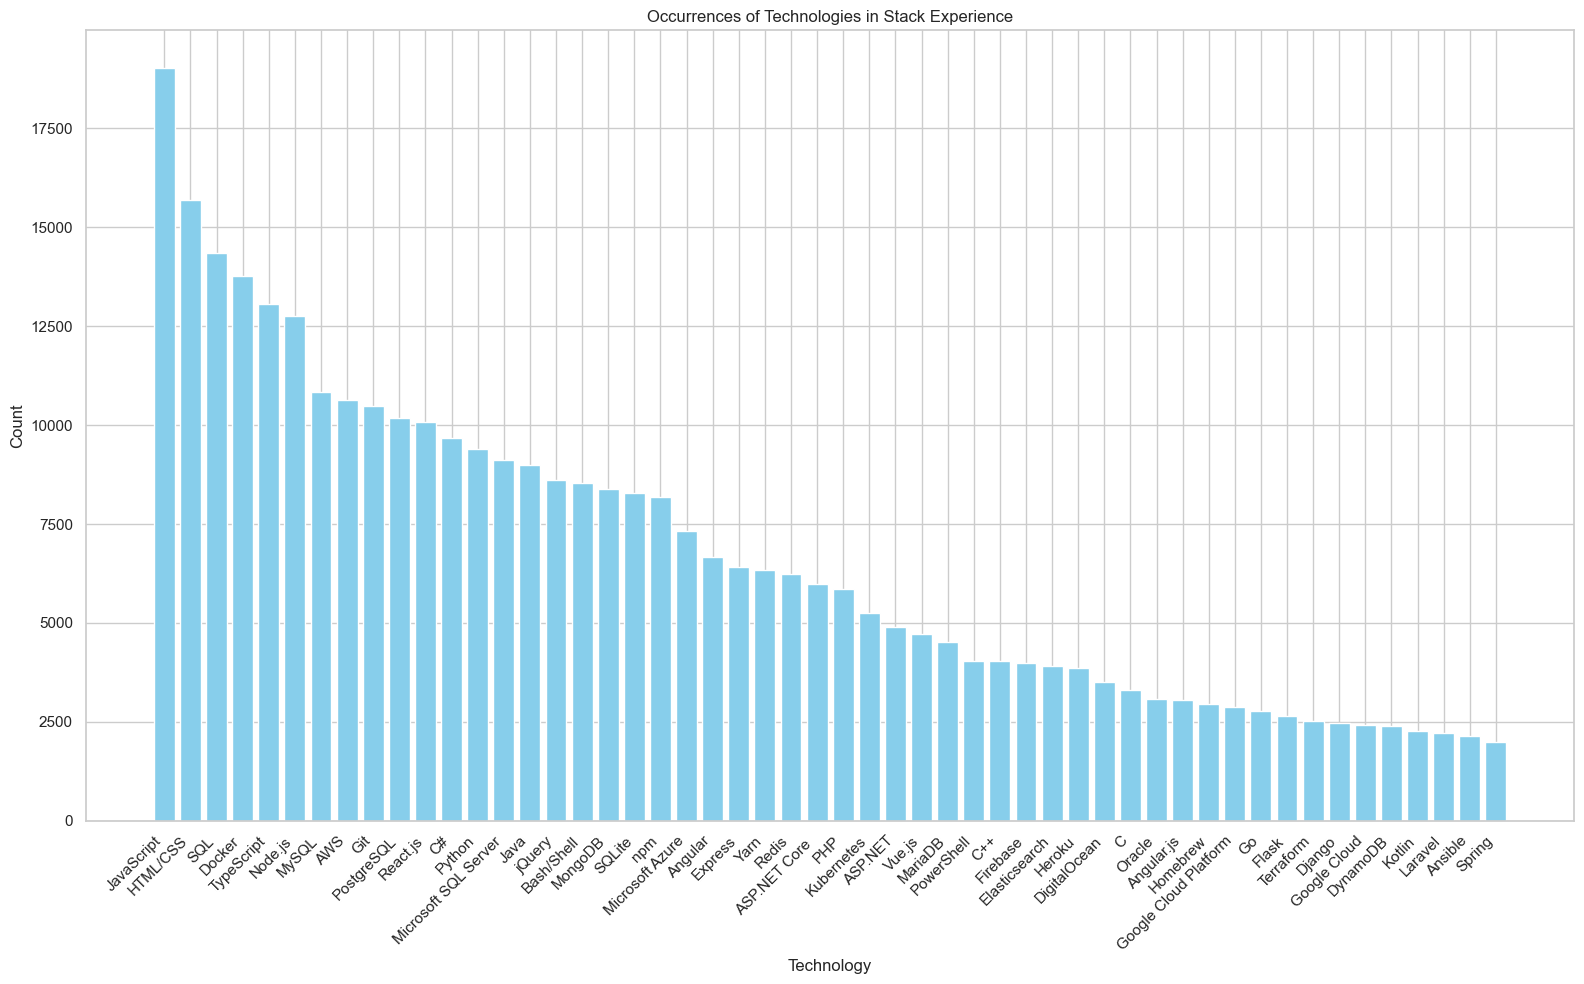

_____________________________________

Stack exprience:
Data shape after adding binary technology features: (41185, 63), (11093, 63) (18000, 62)
_____________________________________
Data shape after removing ID feature: (41185, 62), (11093, 62), (18000, 61)
_____________________________________
PCA:


_____________________________________
Data shape after spliting the data: (41185, 61), (11093, 61), (41185,), (11093,)
Explained Variance Ratio: [0.18768461 0.15617114 0.08318497 0.07988748 0.07008481 0.03186005
 0.02918544 0.02655571 0.0224856  0.01926541 0.0180441  0.01731957
 0.01666232 0.01500665 0.01428555 0.01401624 0.01382607 0.01170998
 0.01156456 0.0106166  0.0100839  0.00980033 0.00888667 0.00860888
 0.00818281 0.00777823 0.00745717 0.00718888 0.00679311 0.00636878
 0.00594478 0.0058284  0.00519994 0.00489572 0.00462746 0.00427542
 0.00422151 0.00351992 0.00307629 0.00293862 0.0028606 ]
Explained Variance after PCA:
 [0.18768461 0.15617114 0.08318497 0.07988748 0.07008481 0.03186005
 0.02918544 0.02655571 0.0224856  0.01926541 0.0180441  0.01731957
 0.01666232 0.01500665 0.01428555 0.01401624 0.01382607 0.01170998
 0.01156456 0.0106166  0.0100839  0.00980033 0.00888667 0.00860888
 0.00818281 0.00777823 0.00745717 0.00718888 0.00679311 0.00636878
 0.00594478 0.0058284  0.00519

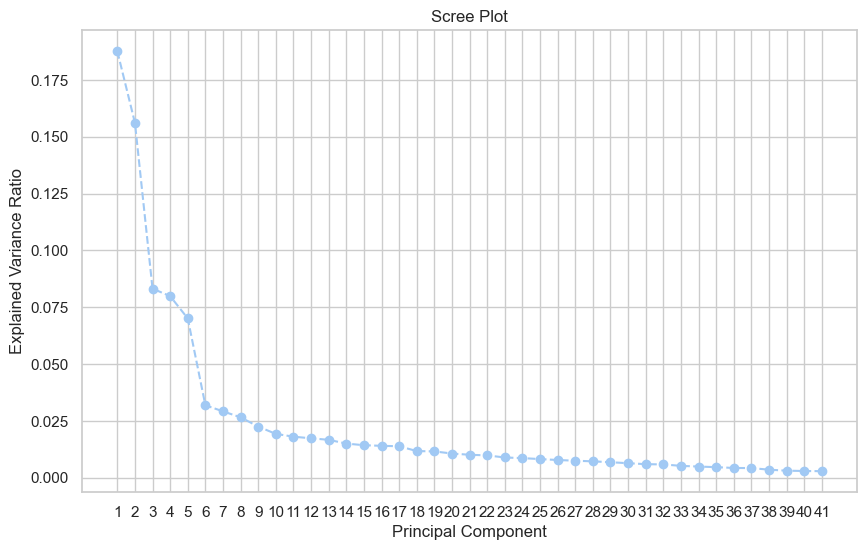


_____________________________________
Models performance on validation:

KNN Train AUC: 0.88, Validation AUC: 0.87
Logistic Regression Train AUC: 0.86, Validation AUC: 0.86
MLP Train AUC: 0.93, Validation AUC: 0.90
Random Forest Train AUC: 0.95, Validation AUC: 0.89


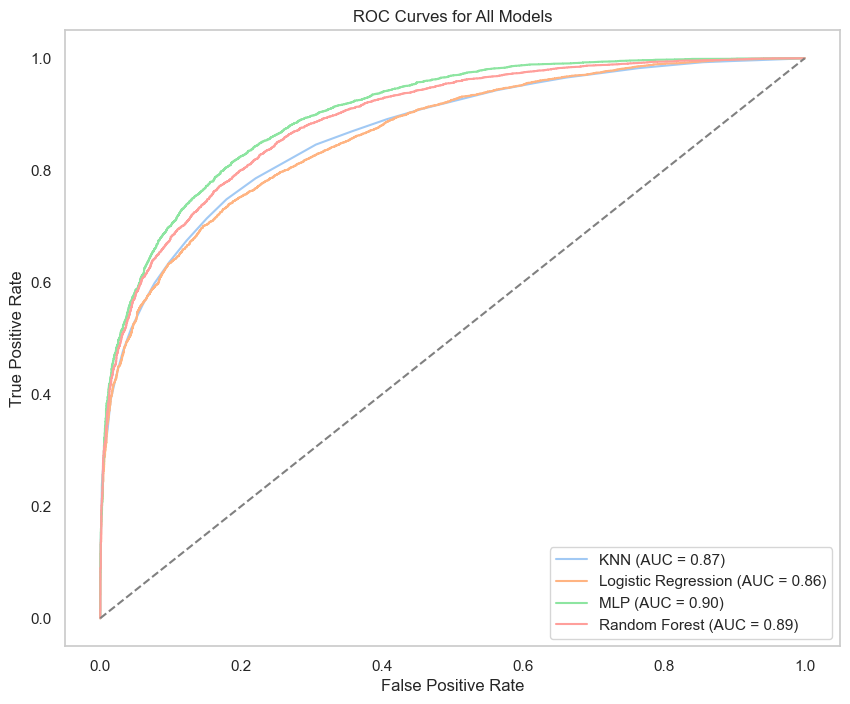

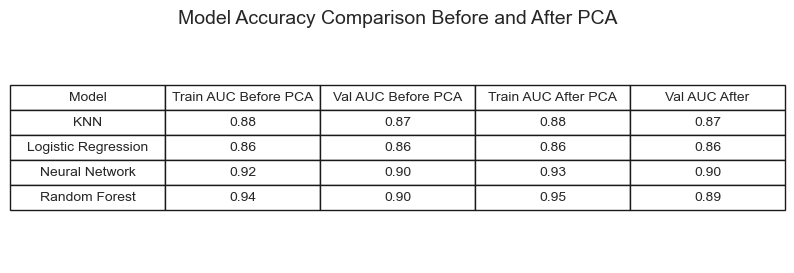

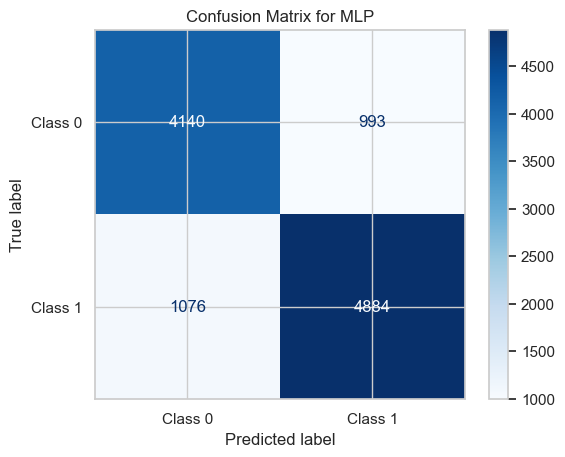


Models performance on train using K-fold:



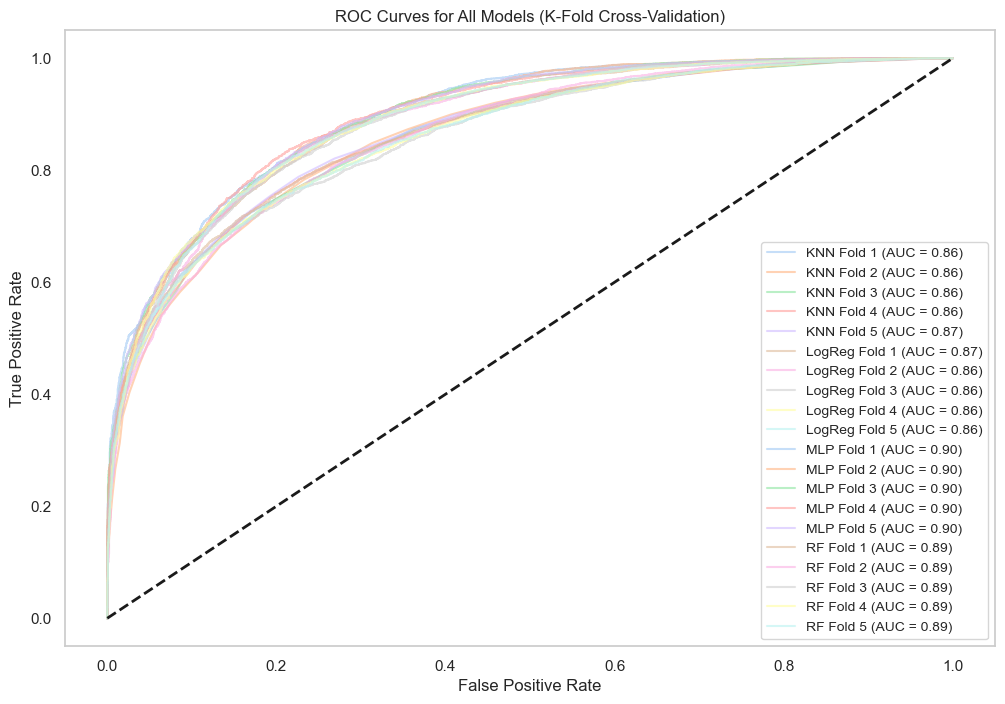

KNN Mean Train AUC: 0.88, Mean Validation AUC: 0.86
Logistic Regression Mean Train AUC: 0.86, Mean Validation AUC: 0.86
MLP Mean Train AUC: 0.93, Mean Validation AUC: 0.90
Random Forest Mean Train AUC: 0.95, Mean Validation AUC: 0.89

Execution time: 1884.9975578784943 seconds


In [34]:
# Record the start time
start_time = time.time()

# Load train and test data 
data = load_data('train.csv')
test = load_data('test.csv')
print(f"Train shape: {data.shape}, Test shape: {test.shape}\n")

# Features 
df_features = data.columns.tolist()

print("_____________________________________")
# Add stack_count feature
df_stack_count = add_stack_count(data) 
print(f"Data shape after adding stack count feature: {df_stack_count.shape}")
test = add_stack_count(test)
print(f"Data shape after adding stack count feature: {test.shape}")

# Spliting the data into validation and train
print("\n_____________________________________")
print("Splitind the data into validation and train:")
train, val = train_test_split(df_stack_count, test_size=0.2, random_state=42)
print("Train shpae after spliting:", train.shape)
print("Validation shape after spliting:", val.shape)

print("_____________________________________")
#Remove outliers
print(color.BOLD + "\nOutliers Removal:" + color.END)
train_no_outliers = remove_outliers(train)
print(color.BOLD + f"Train data shape after outlier removal: {train_no_outliers.shape}" + color.END)

#Normalizing the data
print("_____________________________________")
print(color.BOLD +"\nNormalizing the Data" + color.END)
df_normalized,val_normalized, test_normalized = normalize(train_no_outliers, val, test)
# Check means and standard deviations after normalization
normalized_means_train = df_normalized[['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']].mean()
normalized_means_test = test_normalized[['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']].mean()
normalized_means_val = val_normalized[['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']].mean()
normalized_std_devs_train = df_normalized[['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']].std()
normalized_std_devs_test = test_normalized[['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']].std()
normalized_std_devs_val = val_normalized[['years_of_experience', 'prev_salary', 'A', 'B', 'D', 'stack_count']].std()
print("Train means after normalization:\n", normalized_means_train)
print("Standard deviations after normalization:\n", normalized_std_devs_train)
print(color.BOLD + f"Train data shape after normalizeing : {df_normalized.shape}" + color.END)
print(color.BOLD + f"Val data shape after normalizeing : {val_normalized.shape}" + color.END)
print(color.BOLD + f"Test data shape after normalizeing : {test_normalized.shape}" + color.END)

### MISSING VALUES
# Remove samples with more than 25% missing data
df_cleaned = remove_samples_MV(df_normalized, threshold = 25)
print("\n_____________________________________")
print(color.BOLD + "Missing Values" + color.END)
print(f"Data shape after removing samples with >25% missing: {df_cleaned.shape}")
# Filling missing values: for numerical features with the median, for categorical features with the mode (most frequent)
df_no_missing_values, val_no_missing_values, test_no_missing_values = filling_missing_values(df_cleaned, val_normalized, test_normalized)
print(f"Data shape after filling missing values: {df_no_missing_values.shape}, {val_no_missing_values.shape}, {test_no_missing_values.shape}")


# Country feature - filling missing values and converting to a binary
print("_____________________________________")
print(color.BOLD + "\nCountry feature - filling missing values and converting to a binary" + color.END)
df_adj_country, val_adj_country, test_adj_country = country_red_and_encoding(df_no_missing_values, val_no_missing_values, test_no_missing_values)
print(f"Data shape after adjusting country: {df_adj_country.shape}, {val_adj_country.shape}, {test_adj_country.shape}")

# Converting other categorical features to numerical
print("_____________________________________")
print(color.BOLD + "\nConverign other categorical features to numerical" + color.END)
df_num, val_num, test_num = categ_to_num(df_adj_country, val_adj_country, test_adj_country)
print(f"Data shape after converting categorical features: {df_num.shape}, {val_num.shape}, {test_num.shape}")

# Adding 10 binary features of top relevant technologies 
df_label_1 = data[data['label'] == 1]
count_tech_for_1 = count_technology(df_label_1)
df_binary_tech, val_binary_tech, test_binary_tech = find_top_n_technology_features(df_num, val_num, test_num, count_tech_for_1, 10)
df_binary_tech.drop(columns='stack_experience', inplace=True)
val_binary_tech.drop(columns='stack_experience', inplace=True)
test_binary_tech.drop(columns='stack_experience', inplace=True)
print("_____________________________________")
print(color.BOLD + "\nStack exprience:" + color.END)
print(f"Data shape after adding binary technology features: {df_binary_tech.shape}, {val_binary_tech.shape} {test_binary_tech.shape}")

# removing ID feature 
print("_____________________________________")
df_no_ID = df_binary_tech.drop(columns='ID')
val_no_ID = val_binary_tech.drop(columns='ID')
test_no_ID = test_binary_tech.drop(columns='ID')
print(f"Data shape after removing ID feature: {df_no_ID.shape}, {val_no_ID.shape}, {test_no_ID.shape}")

train_new = df_no_ID.copy()
val_new = val_no_ID.copy()
test_new = test_no_ID.copy()

print("_____________________________________")
print(color.BOLD + "PCA:" + color.END)
# plot PCA explained variance
plot_pca_explained_variance(train_new)

# Spliting data 
X_train = train_new.drop(columns='label')
y_train = train_new['label']
X_val = val_new.drop(columns='label')
y_val = val_new['label']
print("_____________________________________")
print(f"Data shape after spliting the data: {X_train.shape}, {X_val.shape}, {y_train.shape}, {y_val.shape}")

# Apply PCA with the optimum n_components
train_pca, val_pca, test_pca, explained_variance, loadings, pca = apply_pca(X_train, X_val, test_new, n_components=41)
print(color.BOLD +'Explained Variance after PCA:\n' + color.END, explained_variance)

# Analyze PCA
loadings = analyze_pca(pca, X_train.columns)

## Part C - models
print("\n_____________________________________")
print(color.BOLD +'Models performance on validation:\n' + color.END)

# KNN model before and after PCA
KNN_train_prob, KNN_val_prob, KNN_train_auc, KNN_val_auc = knn_model(train_pca, y_train, val_pca, y_val, 35, 2, 'uniform')
print(f"KNN Train AUC: {KNN_train_auc:.2f}, Validation AUC: {KNN_val_auc:.2f}")
#Before PCA
KNN_train_prob_before_pca, KNN_val_prob_before_pca, KNN_train_auc_before_pca, KNN_val_auc_before_pca = knn_model(X_train, y_train, X_val, y_val, 35, 2, 'uniform')

# Logistic Regression Model before and after PCA
LR_train_prob, LR_val_prob, LR_train_auc, LR_val_auc = logreg_model(train_pca, y_train, val_pca, y_val, 'lbfgs')
print(f"Logistic Regression Train AUC: {LR_train_auc:.2f}, Validation AUC: {LR_val_auc:.2f}")
#Before PCA
LR_train_prob_before_pca, LR_val_prob_before_pca, LR_train_auc_before_pca, LR_val_auc_before_pca = logreg_model(X_train, y_train, X_val, y_val, 'lbfgs')


# MLP Model before and after PCA
MLP_train_prob, MLP_val_prob, MLP_val_pred, MLP_train_auc, MLP_val_auc = mlp_model(train_pca, y_train, val_pca, y_val, 'relu',  0.01, (50,), 'adam')
print(f"MLP Train AUC: {MLP_train_auc:.2f}, Validation AUC: {MLP_val_auc:.2f}")
#Before PCA
MLP_train_prob_before_pca, MLP_val_prob_before_pca, MLP_val_pred_before_pca, MLP_train_auc_before_pca, MLP_val_auc_before_pca = mlp_model(X_train, y_train, X_val, y_val, 'relu',  0.01, (50,), 'adam')

# Random Forest Classifier before and after PCA
RF_train_prob, RF_val_prob, RF_train_auc, RF_val_auc = rf_model(train_pca, y_train, val_pca, y_val, 10, None, 10, 100)
print(f"Random Forest Train AUC: {RF_train_auc:.2f}, Validation AUC: {RF_val_auc:.2f}")
#Before PCA
RF_train_prob_before_pca, RF_val_prob_before_pca, RF_train_auc_before_pca, RF_val_auc_before_pca = rf_model(X_train, y_train, X_val, y_val, 10, None, 10, 100)

plot_roc_curves(
     y_val,  # True labels for the validation set
    [KNN_val_prob, LR_val_prob, MLP_val_prob, RF_val_prob],
    ['KNN', 'Logistic Regression', 'MLP', 'Random Forest']  
)

# Compare models before and after PCA
models = [
    {'name': 'KNN', 'train_auc_before': f'{KNN_train_auc_before_pca:.2f}', 'val_auc_before': f'{KNN_val_auc_before_pca:.2f}', 'train_auc_after': f'{KNN_train_auc:.2f}', 'val_auc_after': f'{KNN_val_auc:.2f}'},
    {'name': 'Logistic Regression', 'train_auc_before': f'{LR_train_auc_before_pca:.2f}', 'val_auc_before': f'{LR_val_auc_before_pca:.2f}', 'train_auc_after': f'{LR_train_auc:.2f}', 'val_auc_after': f'{LR_val_auc:.2f}'},
    {'name': 'Neural Network', 'train_auc_before': f'{MLP_train_auc_before_pca:.2f}', 'val_auc_before': f'{MLP_val_auc_before_pca:.2f}', 'train_auc_after': f'{MLP_train_auc:.2f}', 'val_auc_after': f'{MLP_val_auc:.2f}'},
    {'name': 'Random Forest', 'train_auc_before': f'{RF_train_auc_before_pca:.2f}', 'val_auc_before': f'{RF_val_auc_before_pca:.2f}', 'train_auc_after': f'{RF_train_auc:.2f}', 'val_auc_after': f'{RF_val_auc:.2f}'},
]
plot_accuracy_table(models)

## Part D
# Plot confusion matrix for MLP model
plot_confusion_matrix(y_val, MLP_val_pred, 'MLP')

# Plotting ROC curves for all models using K-Fold Cross-Validation and printing mean AUC
print(color.BOLD +'\nModels performance on train using K-fold:\n' + color.END)
cross_val_roc(train_pca, y_train, k=5)

## Part E
# Prediction on test
test_prediction = mlp_test_model(train_pca, y_train, test_pca, 'relu',  0.01, (50,), 'adam')

test_pca_df = pd.DataFrame(test_pca)

# Add the prediction column to the DataFrame
test_pca_df['Prediction'] = test_prediction

# Save the updated DataFrame to a CSV file
test_pca_df.to_csv('results_42.csv', index=False)

# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time} seconds")

